# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [36]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [37]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0              12 FG04-A1-4-start-rep1.txt           0.0    104.545042   
1              13 FG04-A1-4-start-rep2.txt           0.0    104.561540   
2              14 FG04-A1-4-start-rep3.txt           0.0    104.550541   
3             16 FG04-A1-16-start-rep1.txt           0.0    104.105107   
4             17 FG04-A1-16-start-rep2.txt           0.0    104.193094   
5             18 FG04-A1-16-start-rep3.txt           0.0    104.165598   
6             31 FG04-A1-4-middle-rep4.txt           0.0    104.556040   
7                51 FG04-A1-4-end-rep5.txt           0.0    104.572538   
8                52 FG04-A1-4-end-rep6.txt           0.0    104.589035   
9                53 FG04-A1-4-end-rep7.txt           0.0    104.594535   
10              54 FG04-A1-16-end-rep4.txt           0.0    104.187595   
11  55 FG04-A1-16-end-rep5_CRR_DiadFit.txt           1.0    104.209592   
12              56 FG04-A1-16-end-rep6.txt           0.0    104.187595   

      Diad1_pos    Diad2_pos      HB1_pos      HB2_pos      C13_pos  \
0   1282.992617  1387.537659  1262.827099  1409.644390          NaN   
1   1282.998116  1387.559656  1263.267034  1409.039480  1369.940261   
2   1283.014614  1387.565155  1262.629128  1409.171460  1369.956759   
3   1283.899983  1388.005090          NaN  1409.374930          NaN   
4   1283.811996  1388.005090          NaN  1409.215454          NaN   
5   1283.844991  1388.010589          NaN  1409.297942          NaN   
6   1282.998116  1387.554157  1262.733613  1408.934995          NaN   
7   1282.937625  1387.510163  1262.772107  1409.061477  1369.901767   
8   1282.921128  1387.510163          NaN  1409.165961          NaN   
9   1282.915629  1387.510163  1262.546640  1409.050478          NaN   
10  1283.811996  1387.999591          NaN          NaN          NaN   
11  1283.789999  1387.999591          NaN          NaN          NaN   
12  1283.779001  1387.966596          NaN  1409.671886          NaN   

    Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0       717.063155     1431.637087  ...  751.293707         NaN   1408.063155   
1       773.782559     1554.489497  ...  756.700966  728.276482   1462.082546   
2       802.769870     1651.870462  ...  761.199938  730.416344   1489.669864   
3       409.599484      858.033824  ...  717.747446         NaN   1079.399502   
4       413.230685      904.623291  ...  715.476037         NaN   1082.630678   
5       401.541590      881.856984  ...  713.253215         NaN   1070.441615   
6       746.568771     1551.314759  ...  753.837453         NaN   1432.168778   
7       904.157441     1873.307699  ...  771.054696  732.801952   1591.957459   
8       627.839126     1276.835519  ...  756.002069         NaN   1321.139144   
9       734.703756     1498.158622  ...  756.789452         NaN   1424.903769   
10      263.903556      601.340287  ...         NaN         NaN    931.003562   
11      288.938024      662.997738  ...         NaN         NaN    956.938024   
12      330.039037      729.385476  ...  707.004632         NaN    999.139044   

    HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0   733.630916        691.000000        691.000000                     NaN   
1   726.879738        688.299988        688.100006                2.346102   
2   731.323774        686.899994        686.699982                2.322216   
3          NaN        669.800018        669.750015                     NaN   
4          NaN        669.399994        669.199982                     NaN   
5          NaN        668.900024        669.000000                     NaN   
6   725.097205        685.600006        685.250015                     NaN   
7   733.821414        687.800018        687.600006                2.637867   
8          NaN        693.300018        696.950012                     NaN   
9   727.502213        690.200012        692.899994                     NaN   
10       

### Now load one file from this group to tweak parameters for

In [38]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

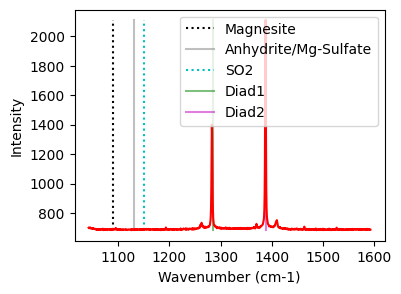

In [39]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [40]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [41]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=717.0631552589111, HB_prom=45.83092866175889, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1283.027202       1283.027252        0.003161       2041.175659   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma     HB1_Cent    HB1_Area  HB1_Sigma  \
0           0.992286                  0  1262.963624  284.023132   2.675653   

   Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  \
0             721.794282        2.633967        0.786722    1.984571   

         Diad1_refit  Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.068421      1.076355                   0.135786   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.002749  PseudoVoigtModel

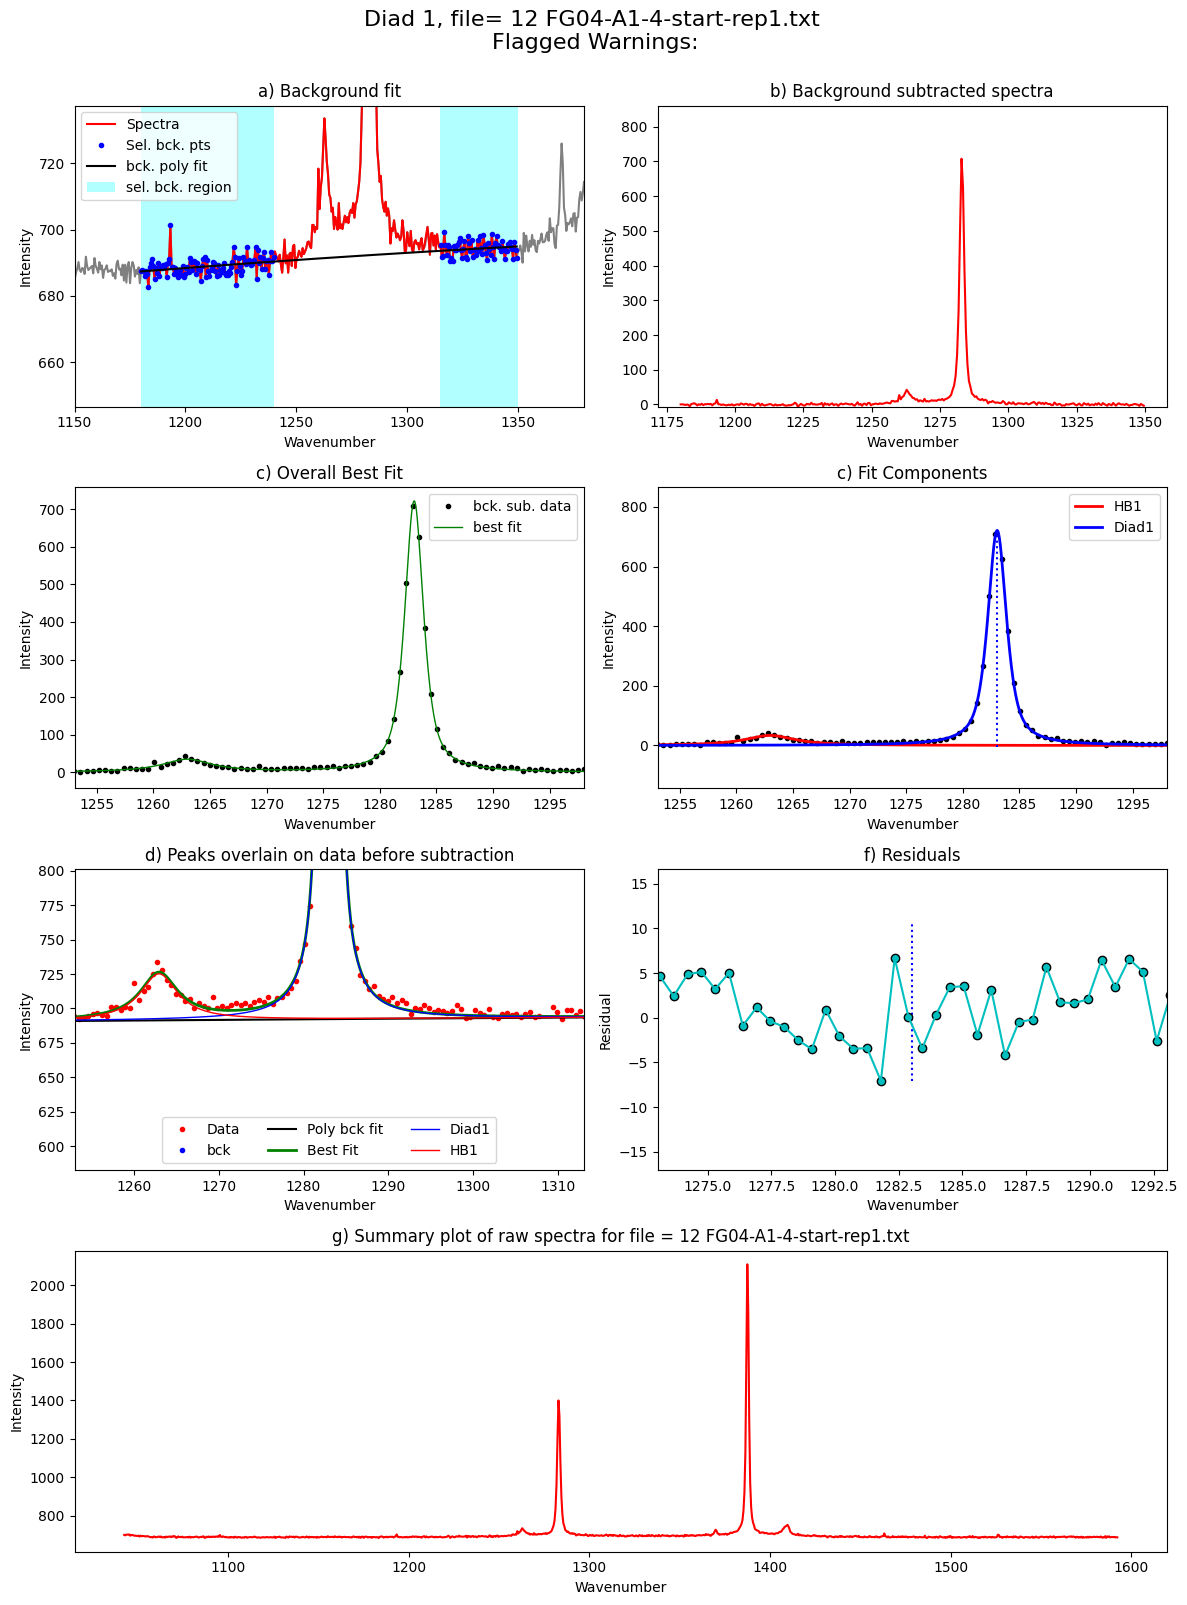

In [42]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [43]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [44]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=126.98743897320242, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1431.6370870861674, HB_prom=63.49371948660121, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.558868       1387.558918        0.001804       3296.215715   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.828331                  0  1409.078003  354.571259   2.132053   

   Diad2_Combofit_Height  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0            1445.188822  ...    1.656661       1384.175182        422.309663   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0          16.429056  Flagged Warnings:      1.049383     1.030568   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                    0.08181              0.001146  PseudoVoigtModel  

[1 rows x 22 columns]

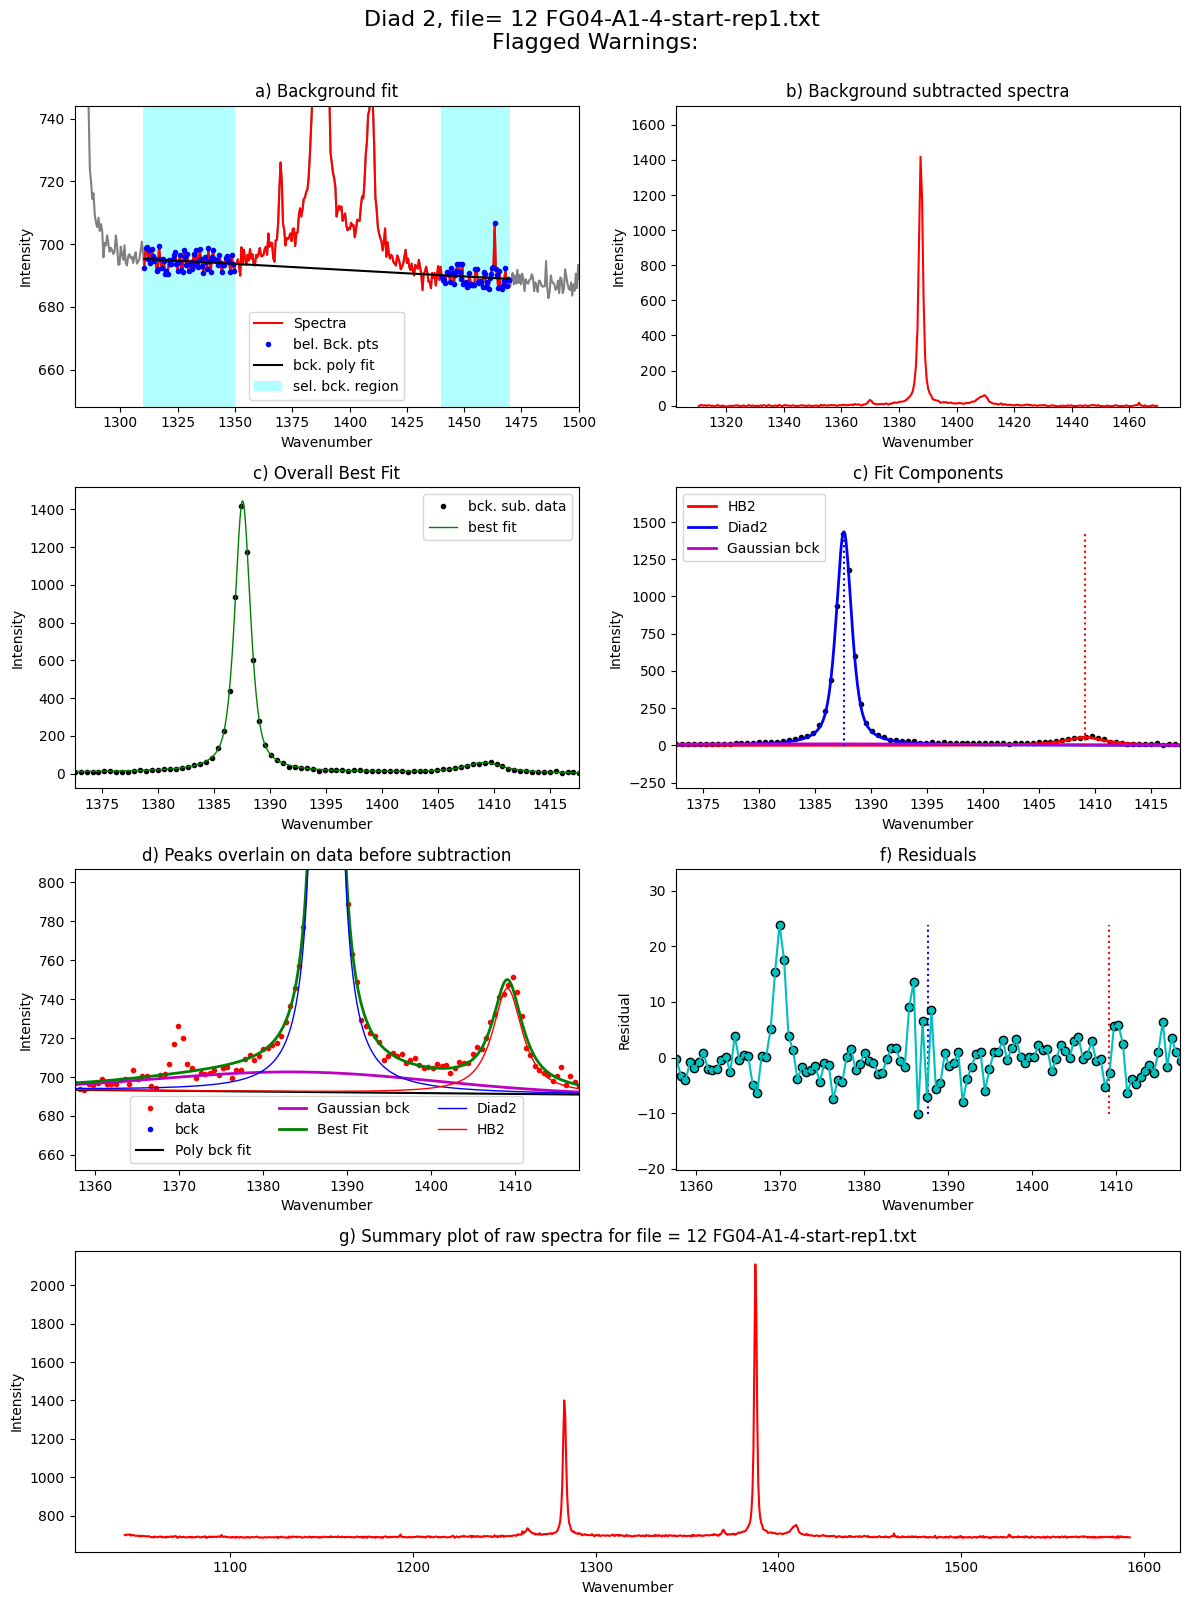

In [45]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/13 [00:00<?, ?it/s]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 12 FG04-A1-4-start-rep1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
  8%|▊         | 1/13 [00:01<00:17,  1.46s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 13 FG04-A1-4-start-rep2.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


refit attempt 1


 15%|█▌        | 2/13 [00:03<00:19,  1.80s/it]

Processing file: 14 FG04-A1-4-start-rep3.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 23%|██▎       | 3/13 [00:05<00:17,  1.72s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead

Processing file: 16 FG04-A1-16-start-rep1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 31%|███       | 4/13 [00:06<00:13,  1.55s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 17 FG04-A1-16-start-rep2.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 38%|███▊      | 5/13 [00:07<00:11,  1.48s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 18 FG04-A1-16-start-rep3.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 46%|████▌     | 6/13 [00:09<00:09,  1.42s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 31 FG04-A1-4-middle-rep4.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 54%|█████▍    | 7/13 [00:10<00:08,  1.45s/it]

Processing file: 51 FG04-A1-4-end-rep5.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 62%|██████▏   | 8/13 [00:13<00:09,  1.94s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead

Processing file: 52 FG04-A1-4-end-rep6.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 69%|██████▉   | 9/13 [00:14<00:07,  1.77s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 53 FG04-A1-4-end-rep7.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 77%|███████▋  | 10/13 [00:16<00:04,  1.64s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:3128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

Processing file: 54 FG04-A1-16-end-rep4.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 85%|████████▍ | 11/13 [00:17<00:03,  1.52s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 55 FG04-A1-16-end-rep5_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 92%|█████████▏| 12/13 [00:18<00:01,  1.47s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 56 FG04-A1-16-end-rep6.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2462: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
100%|██████████| 13/13 [00:20<00:00,  1.55s/it]


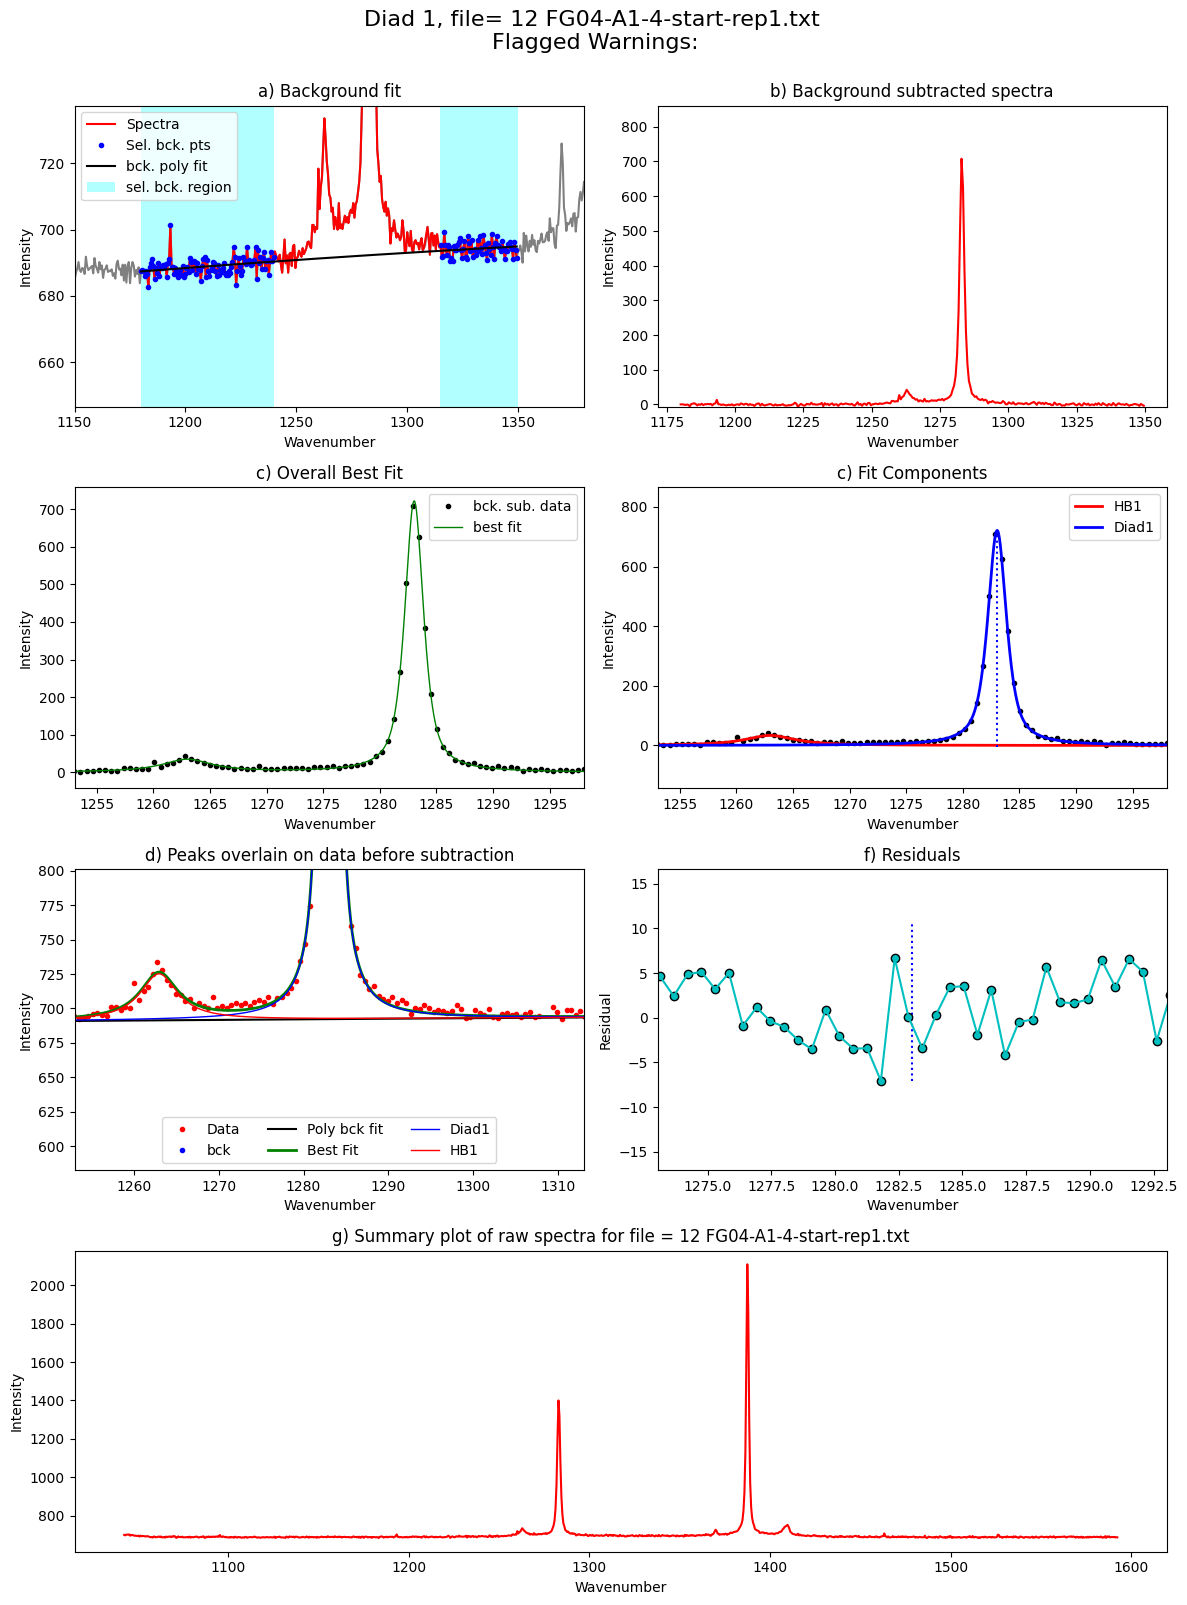

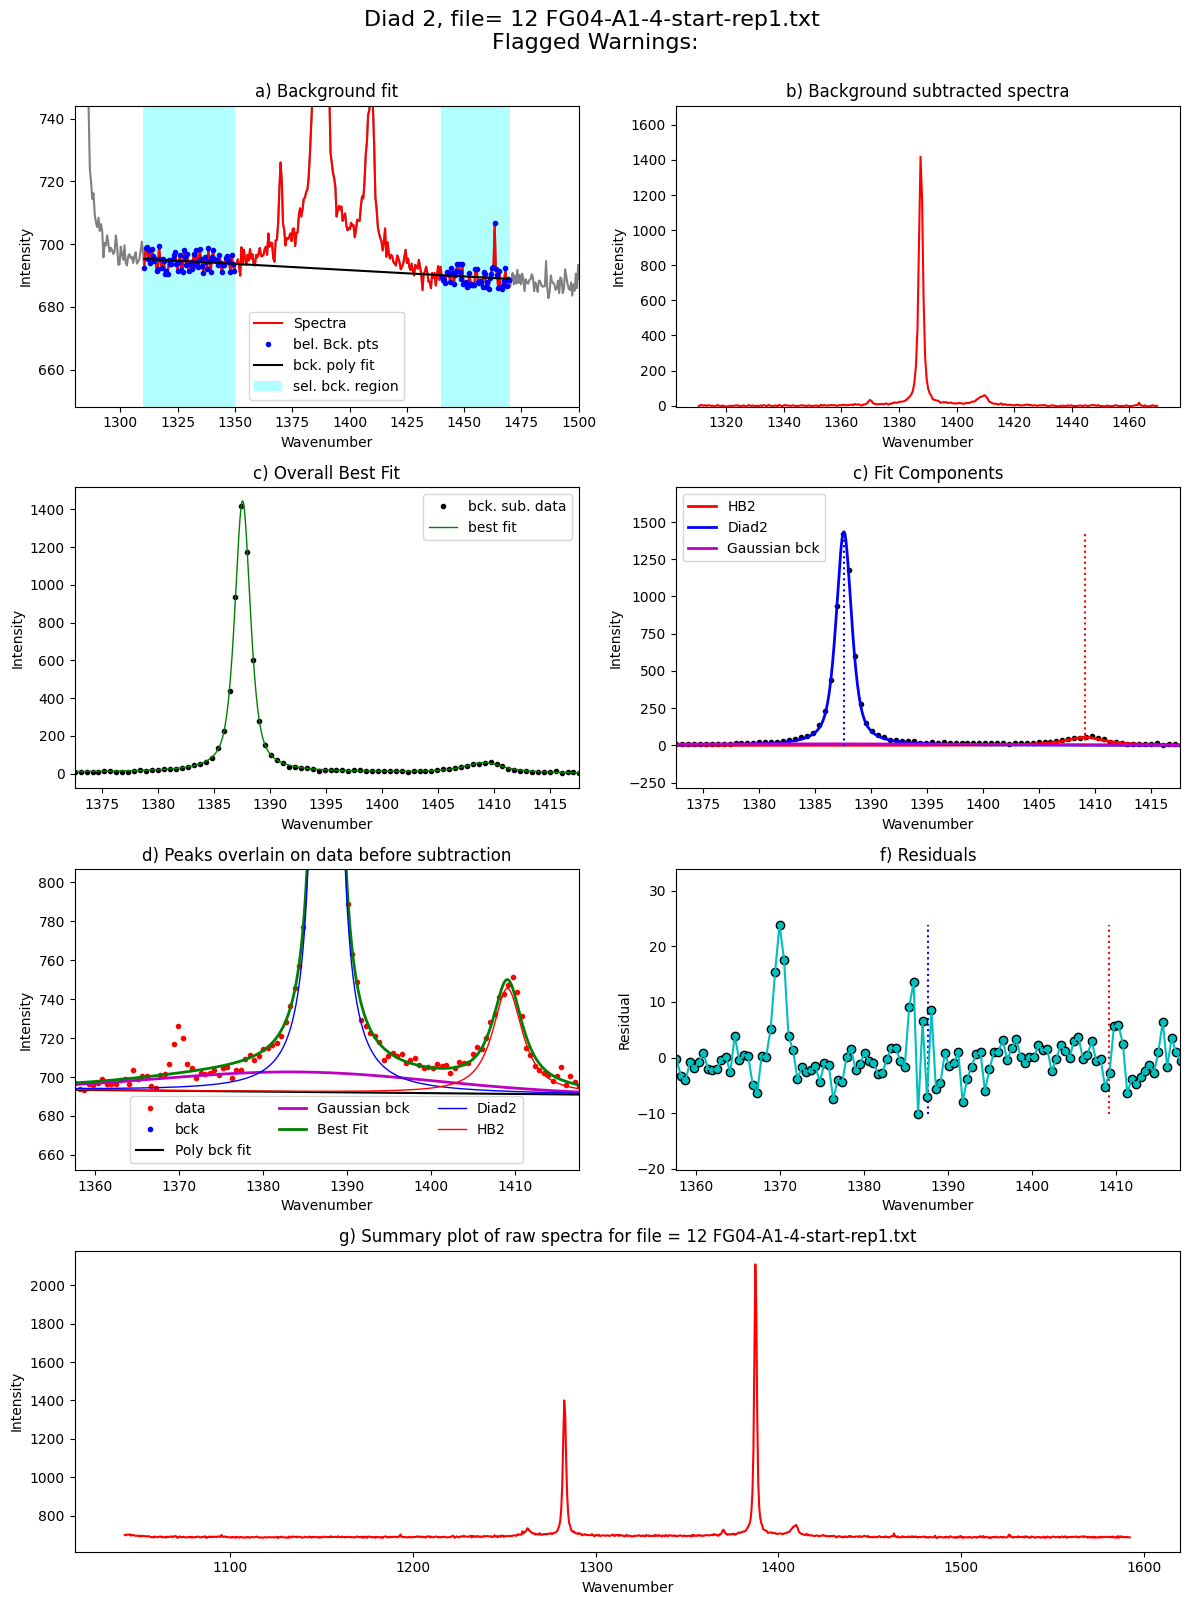

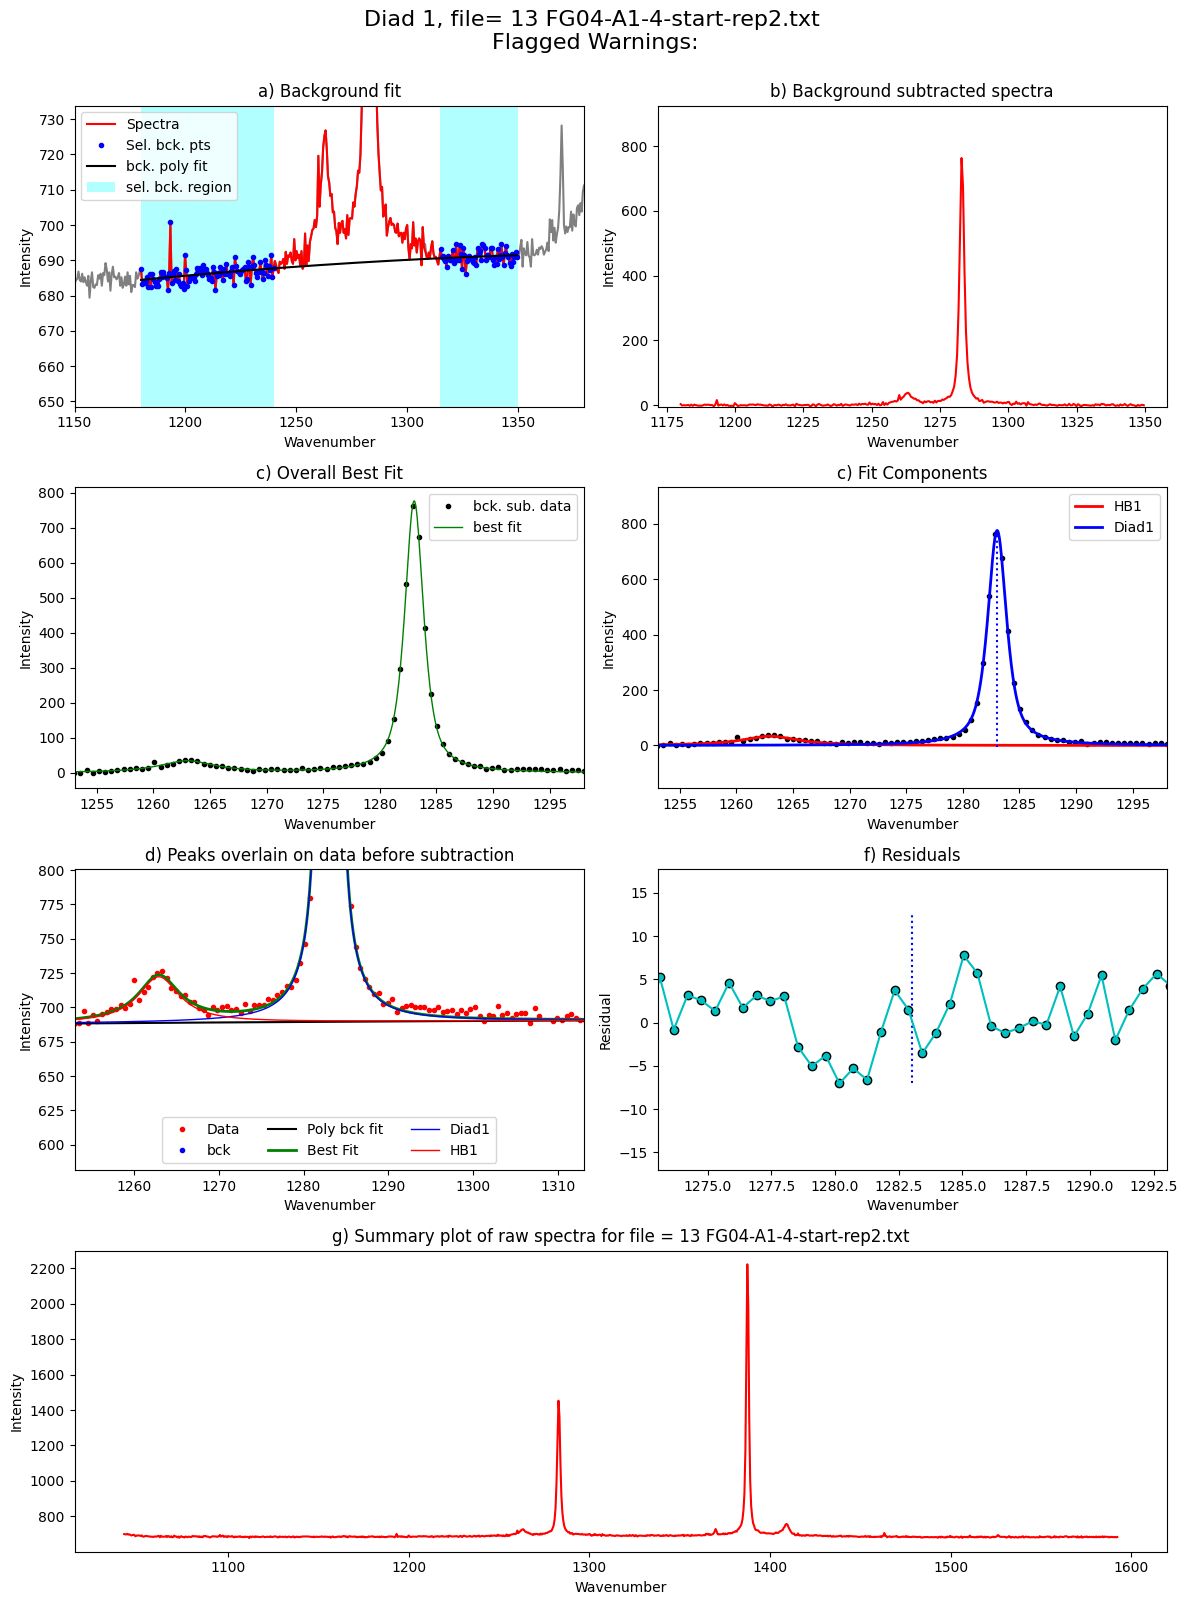

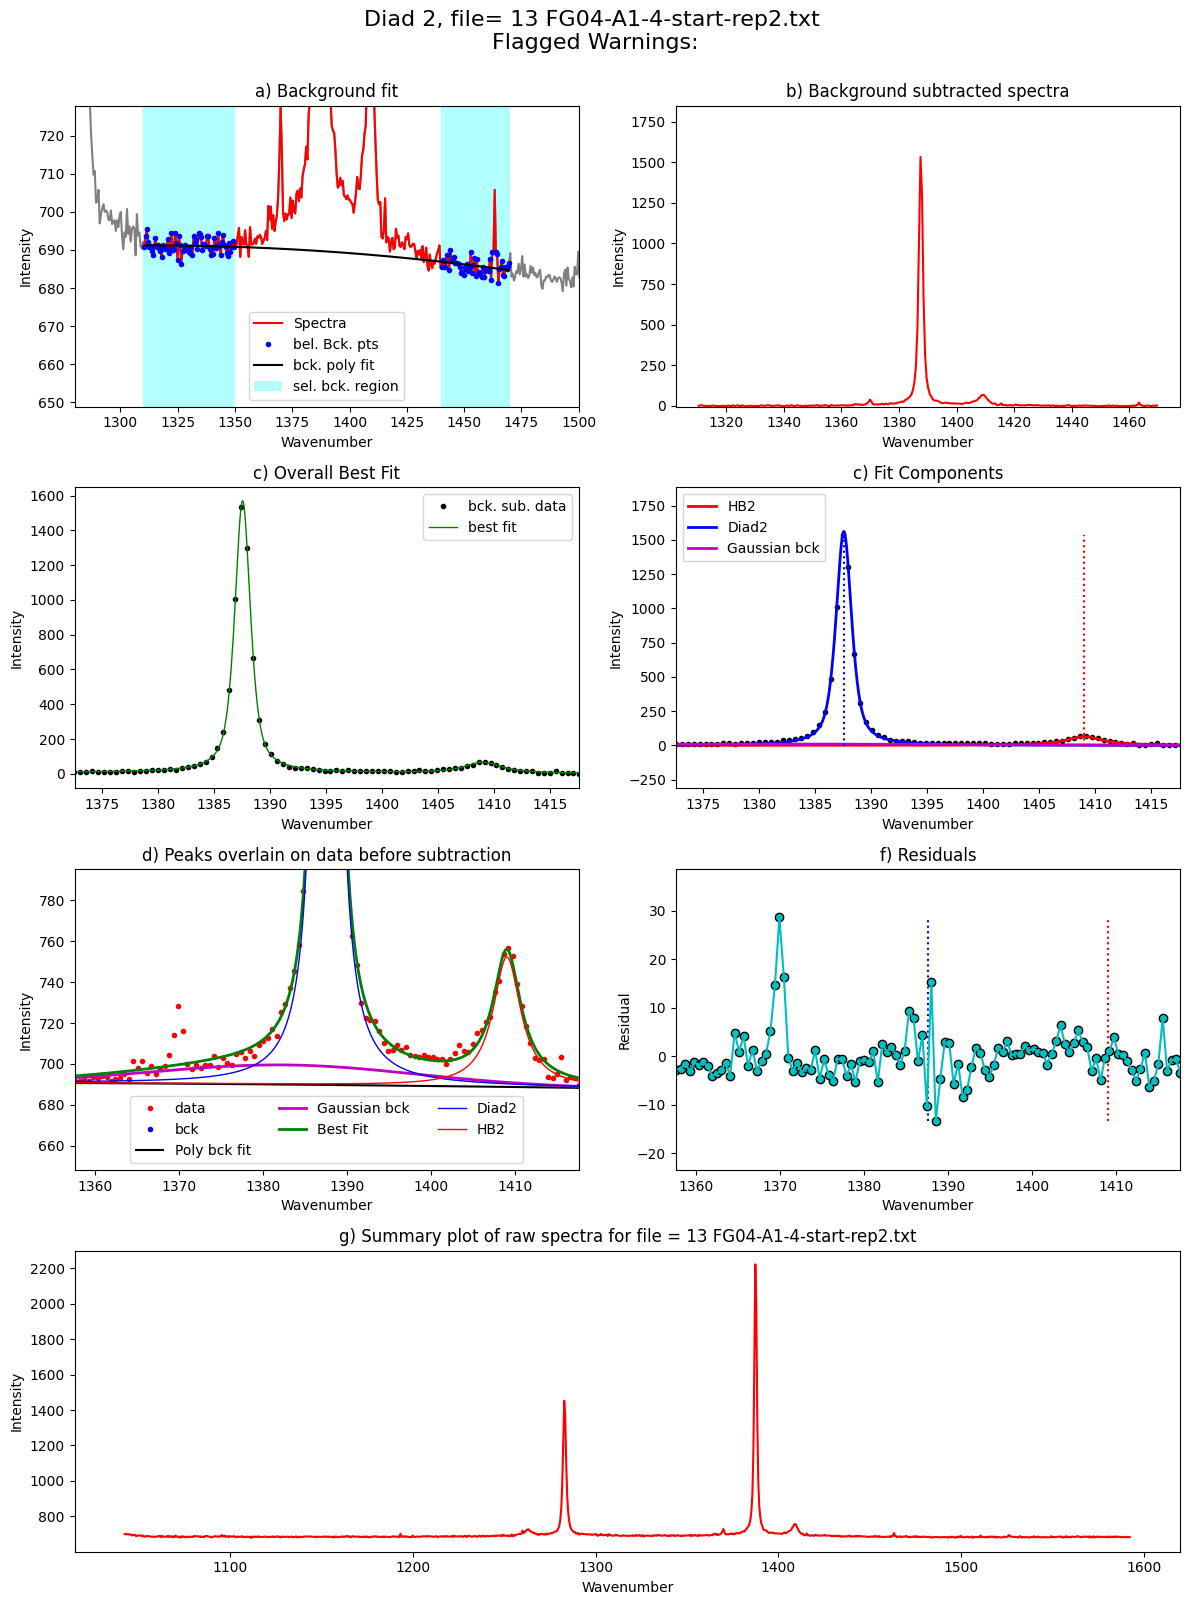

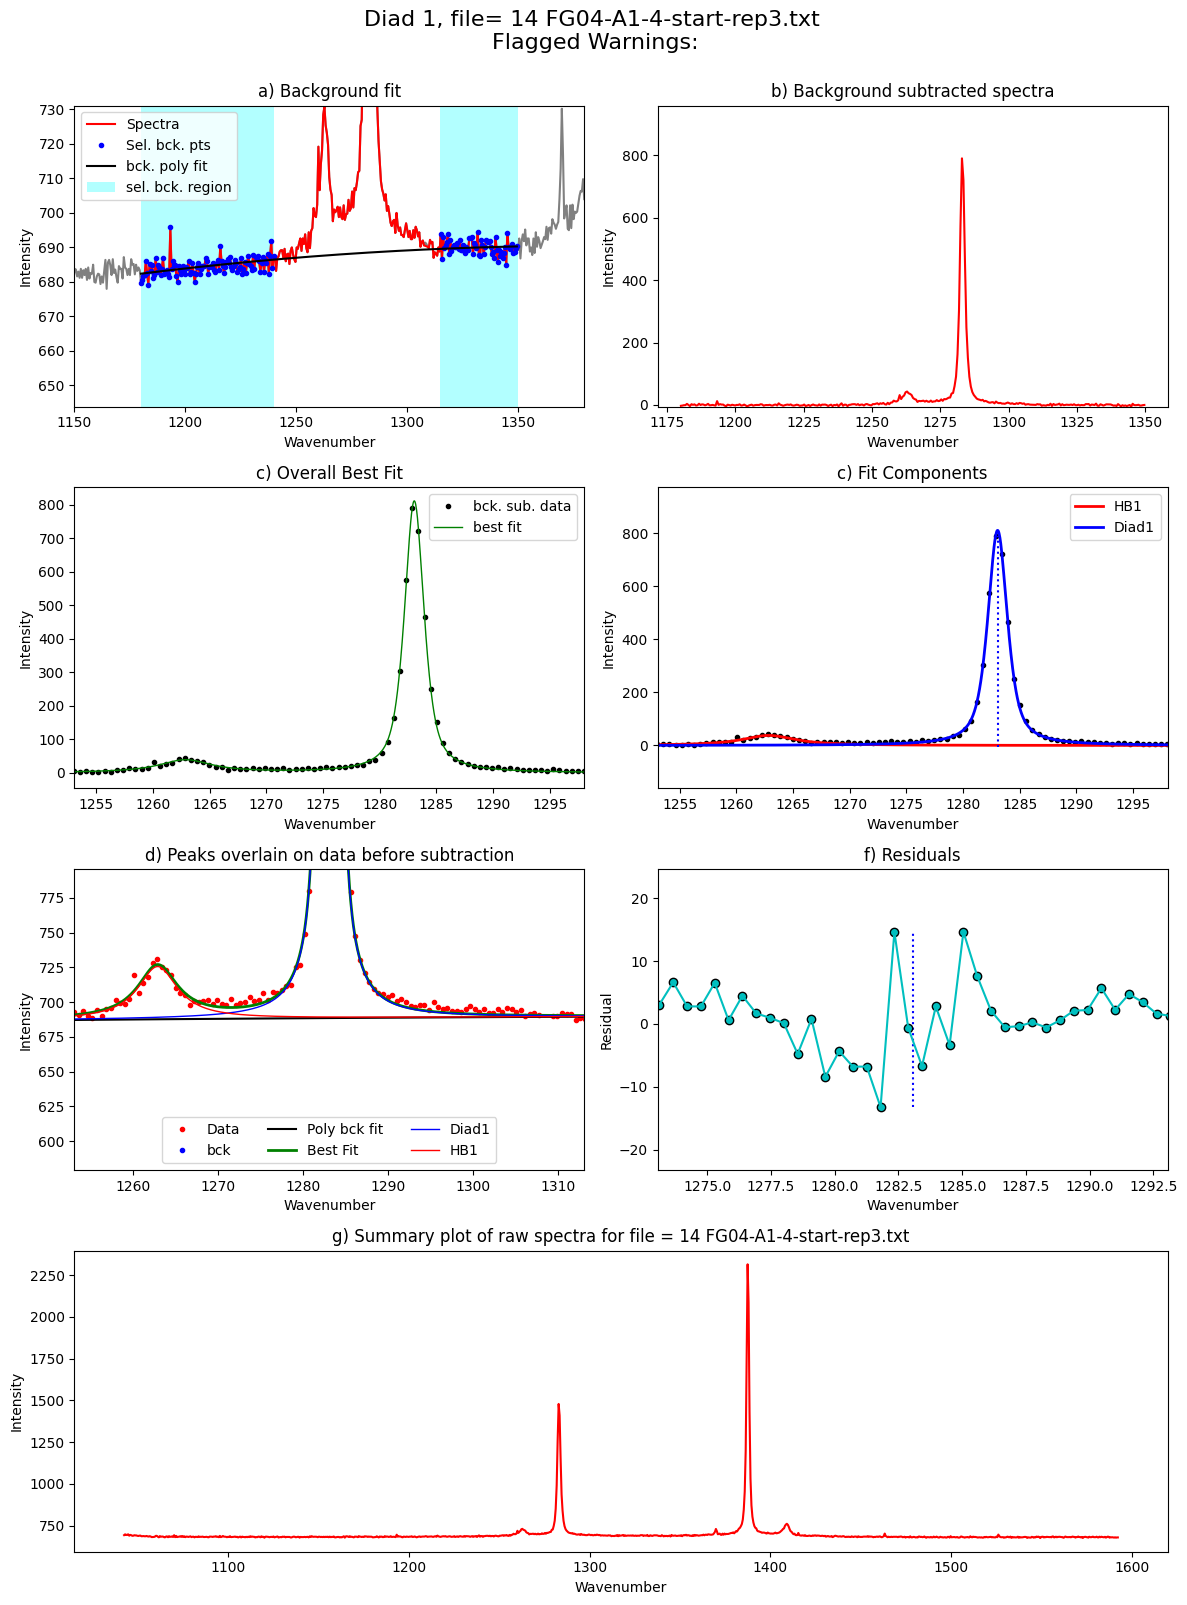

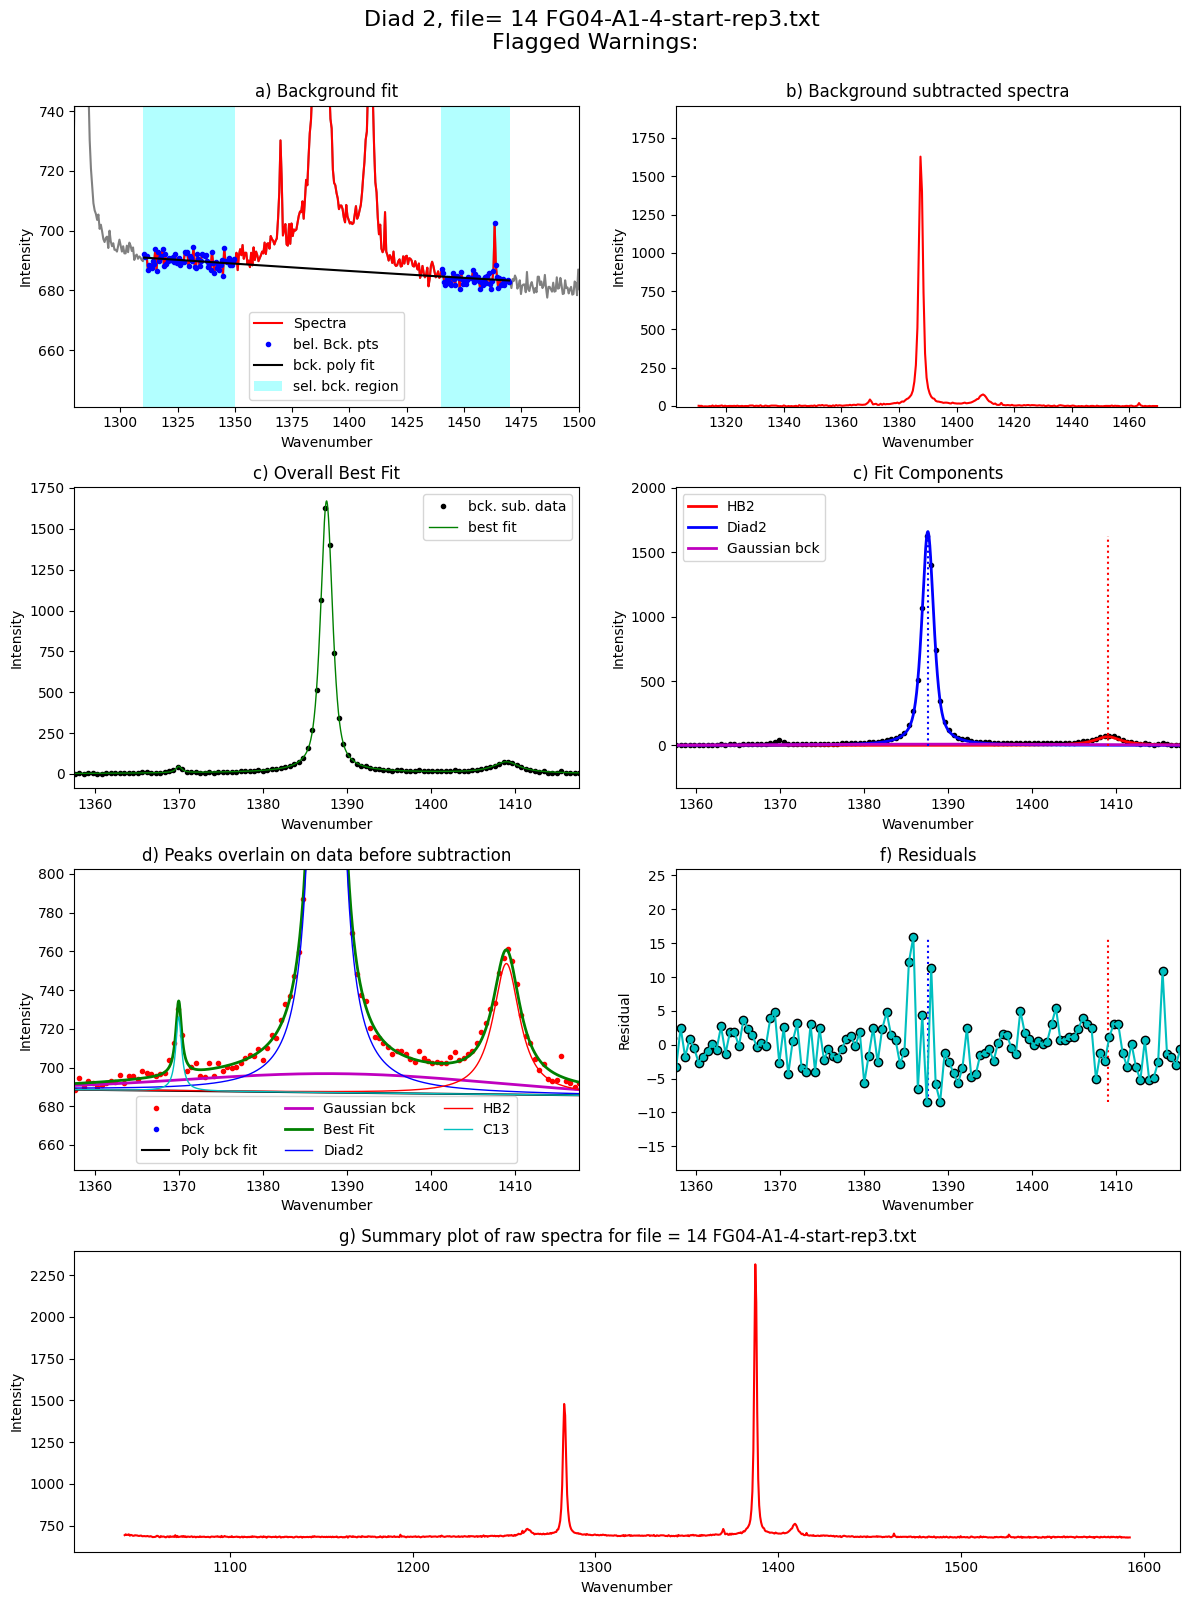

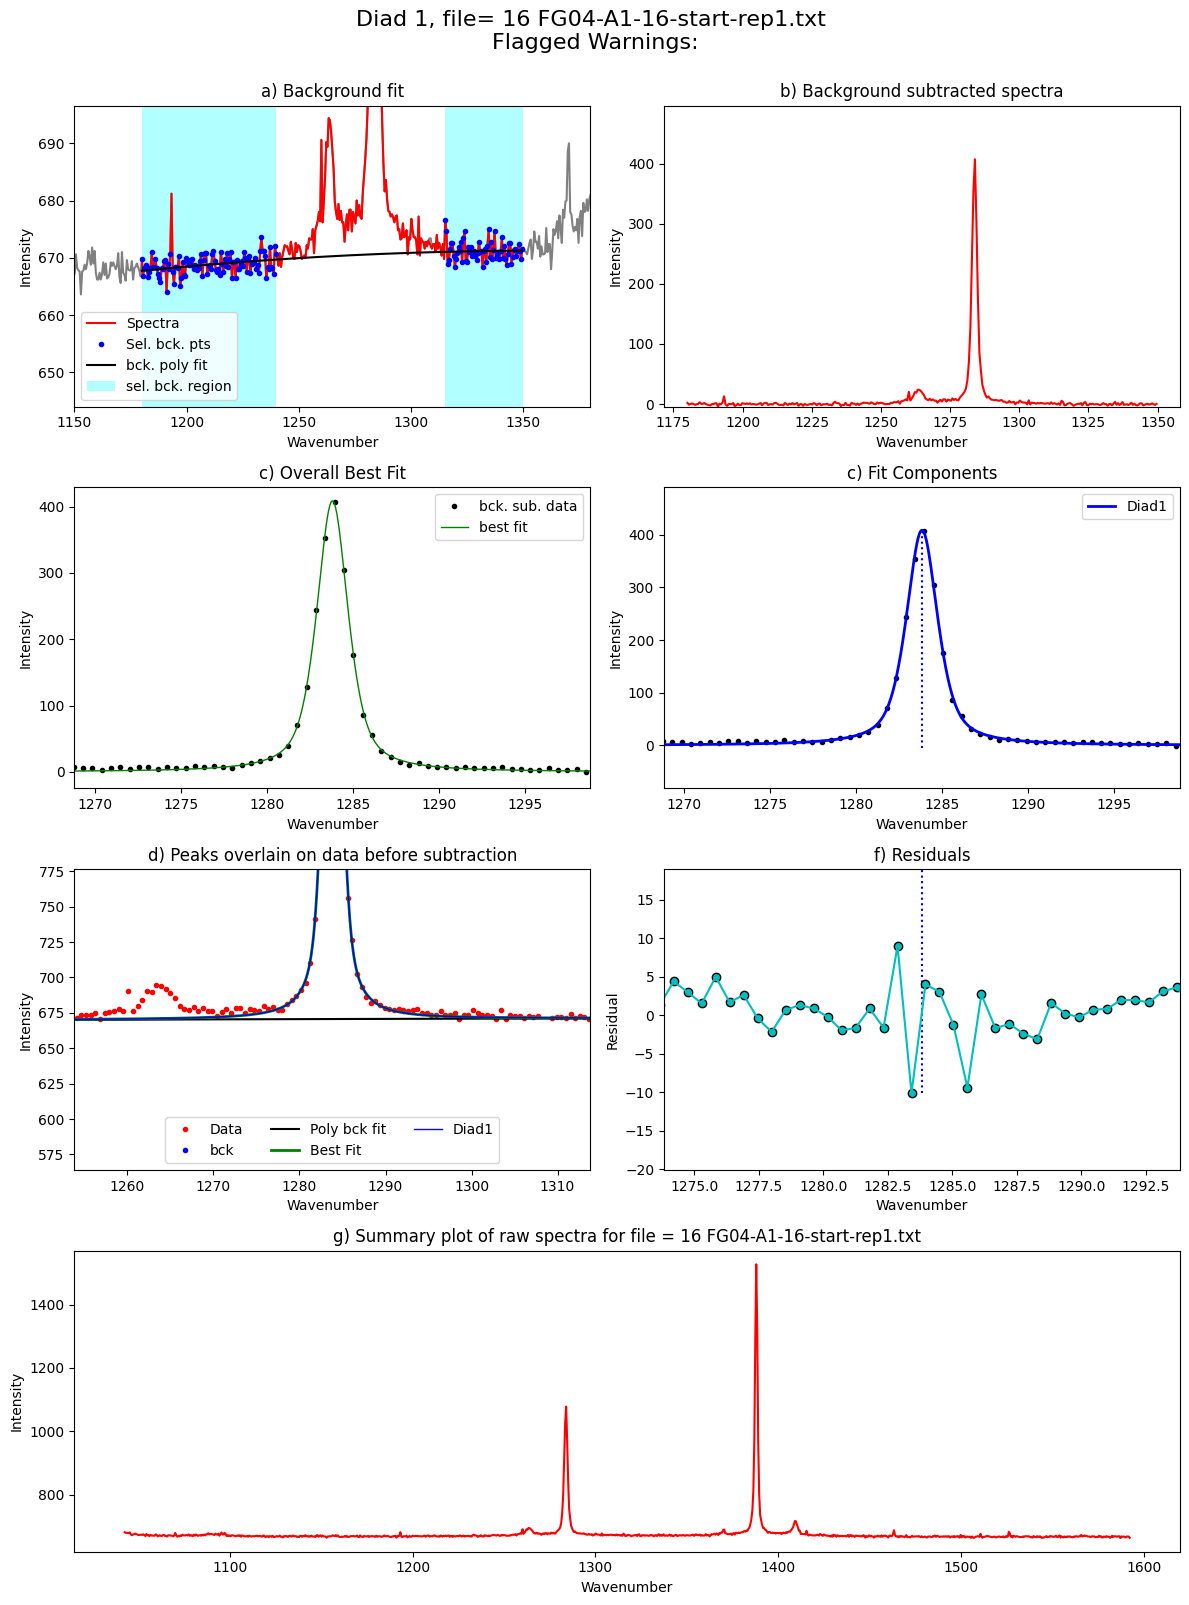

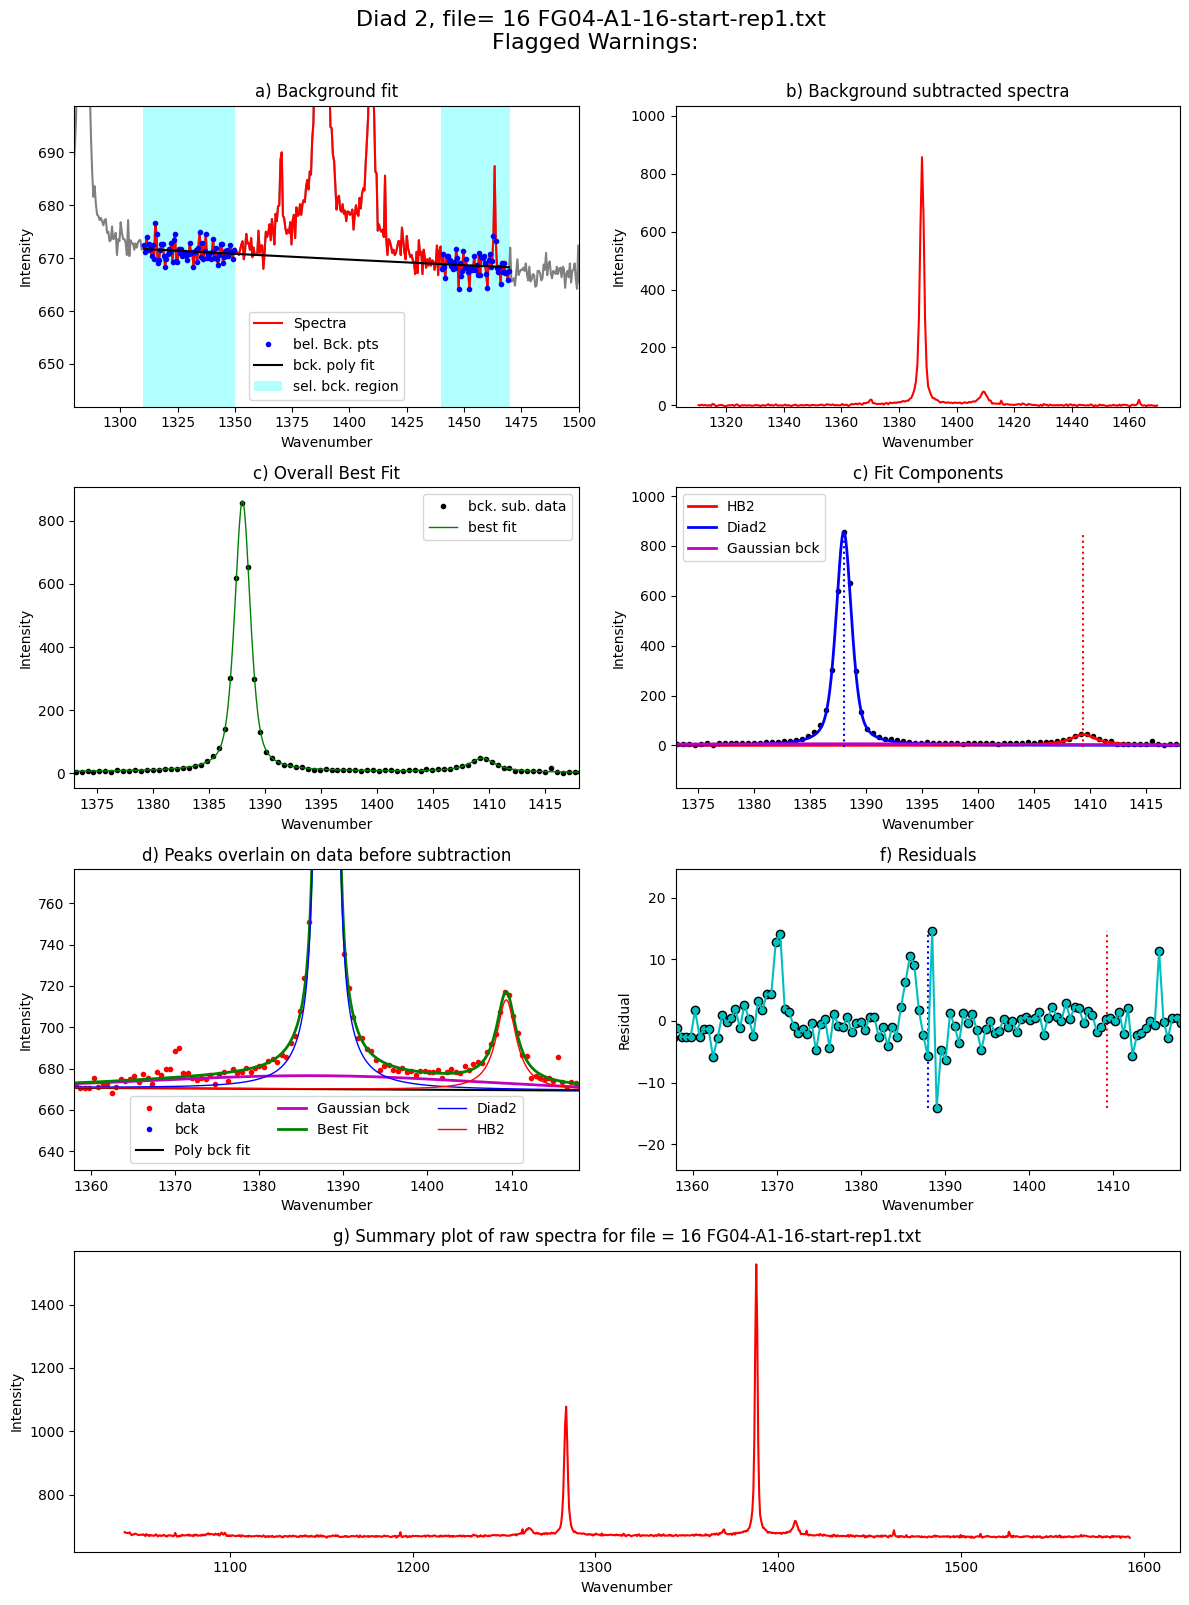

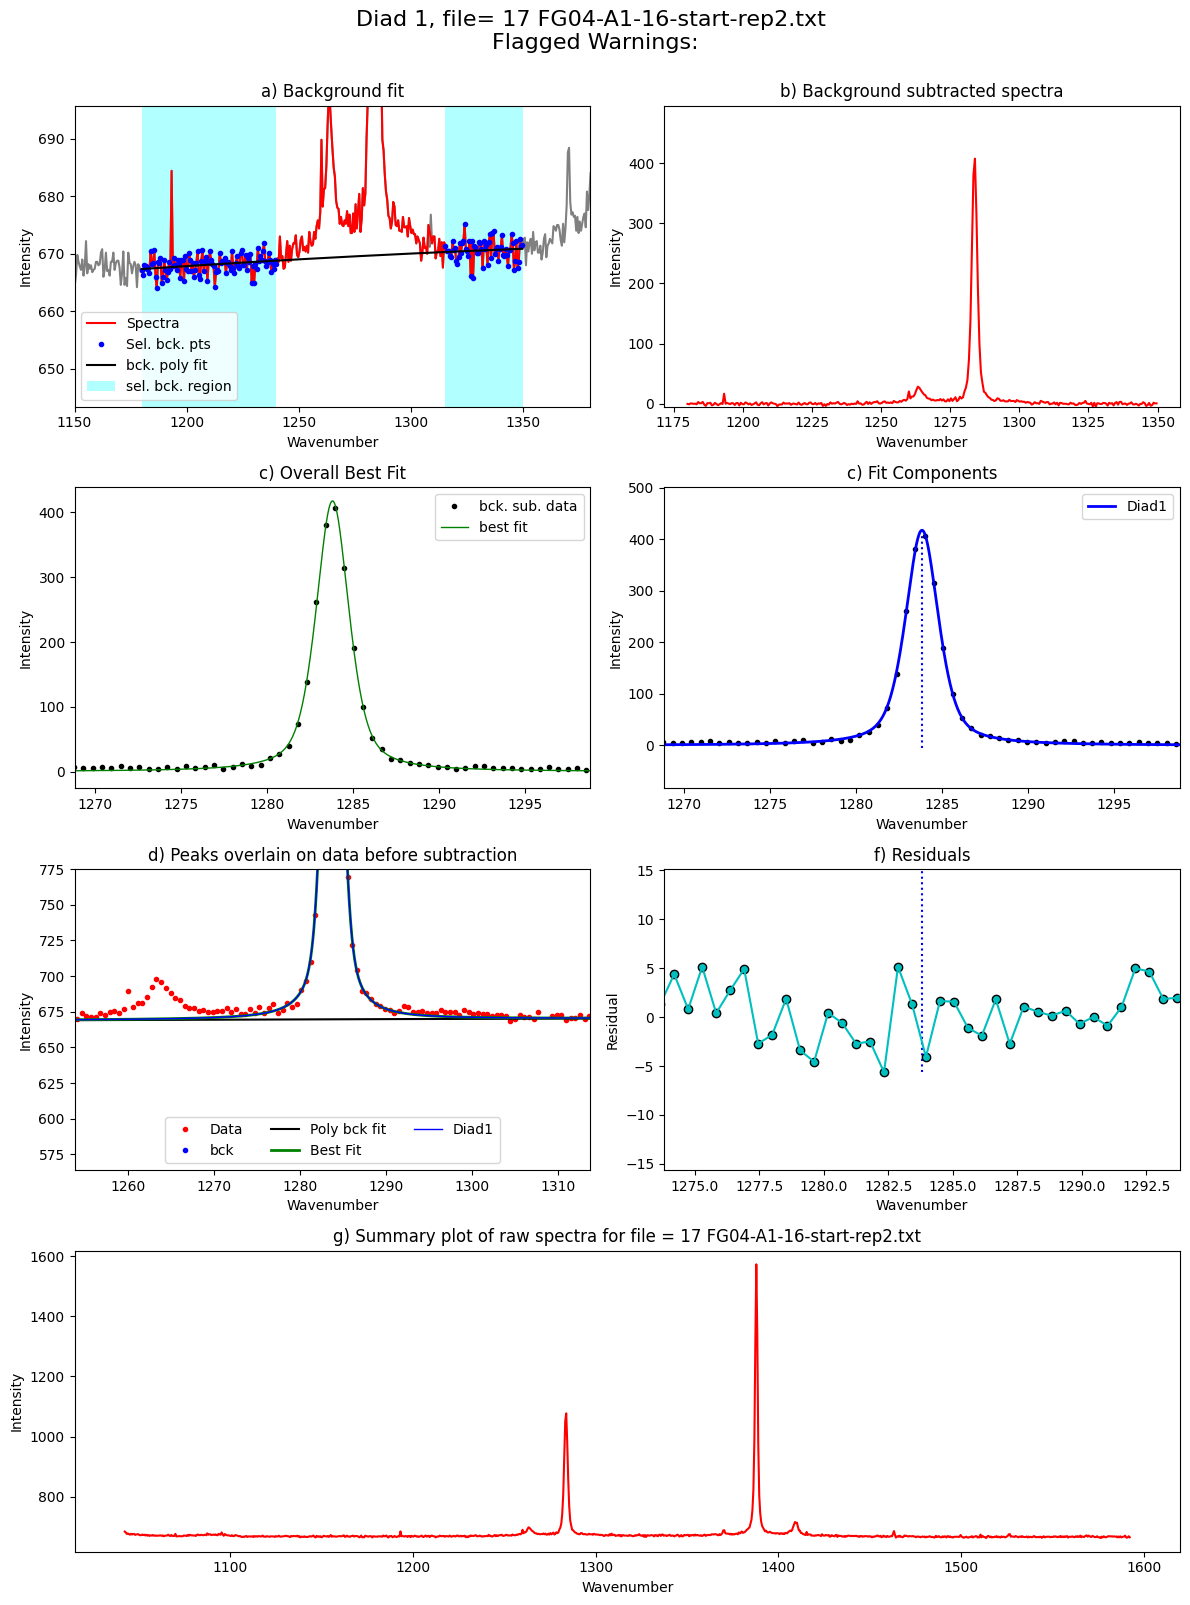

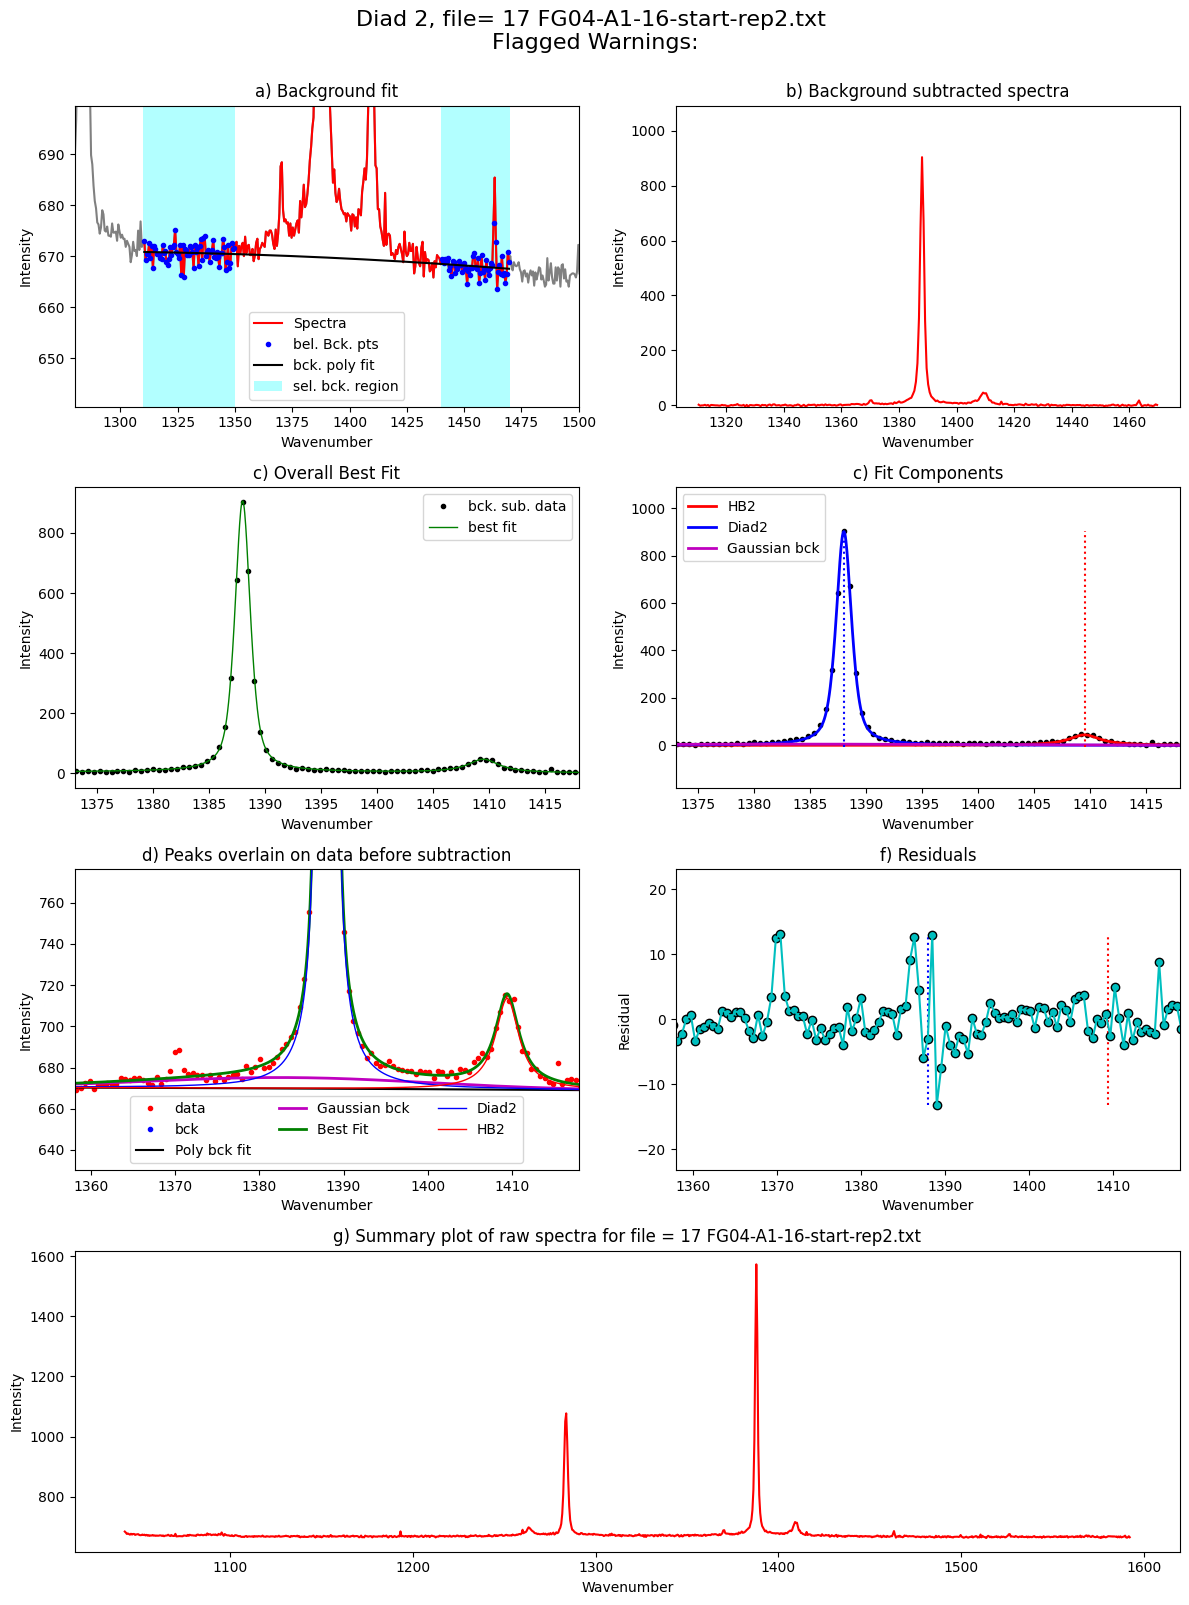

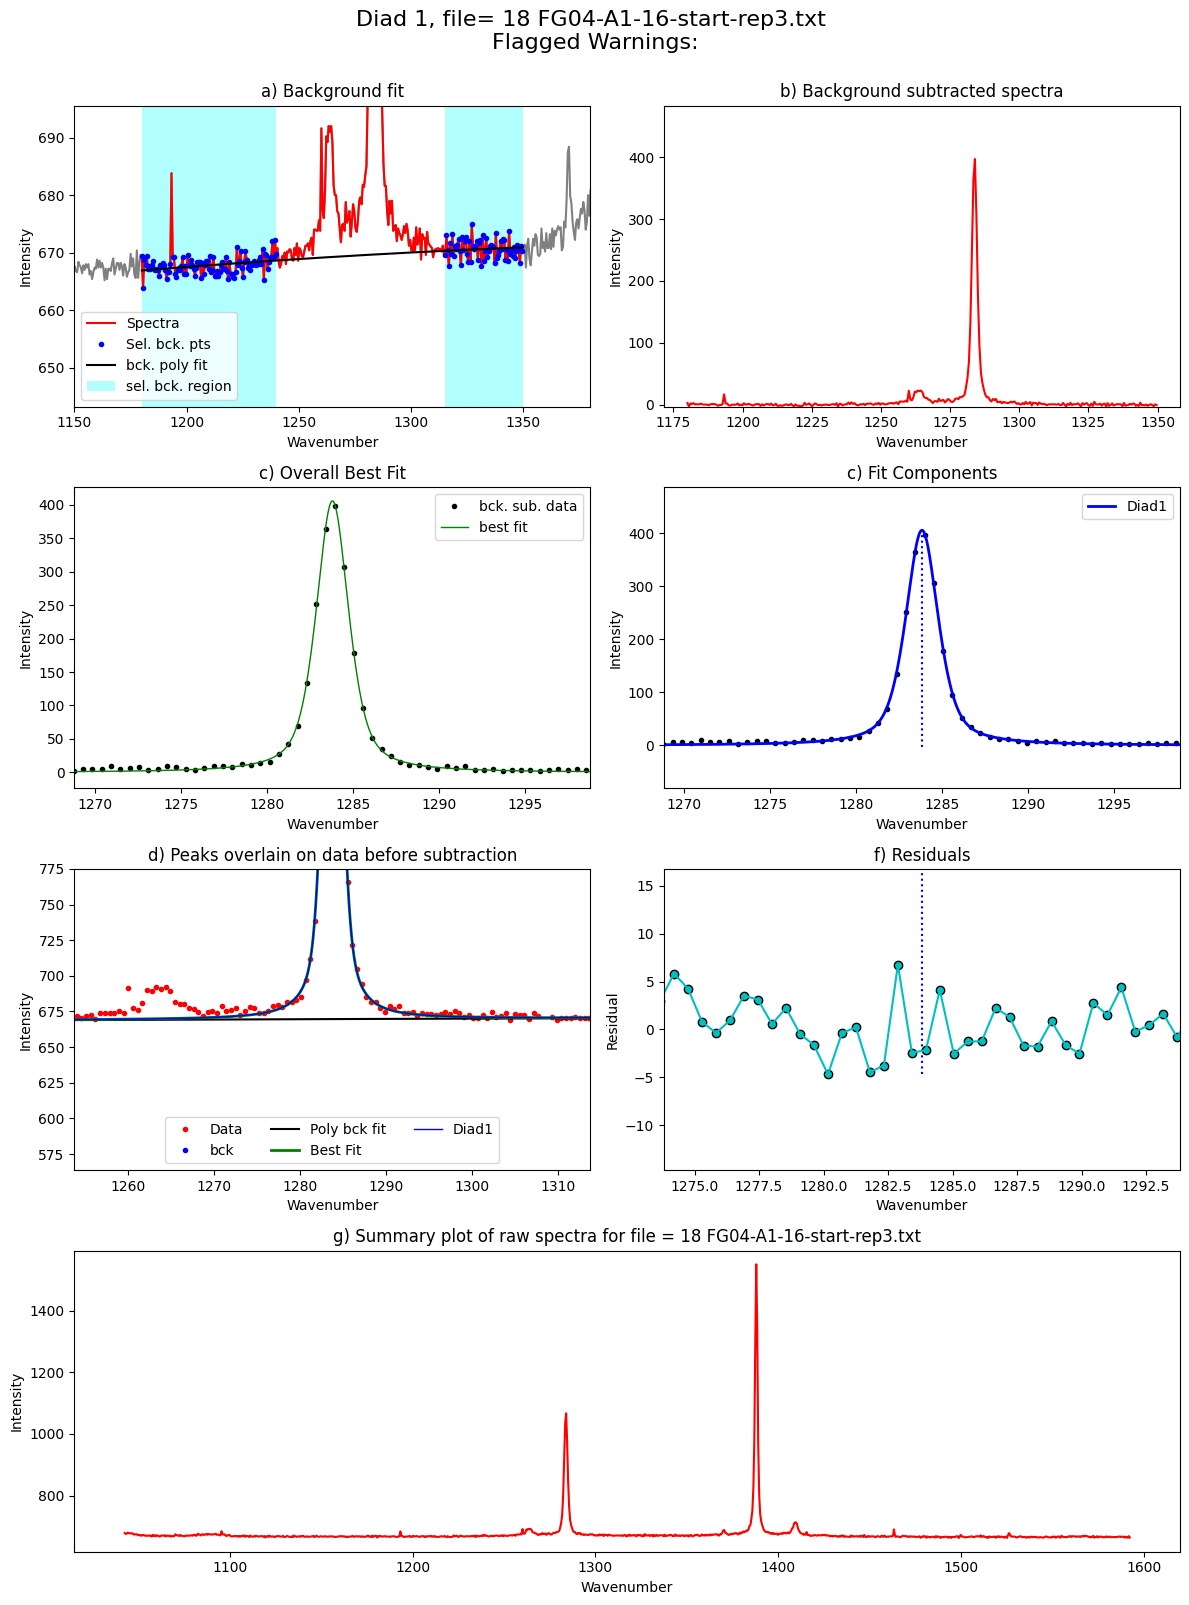

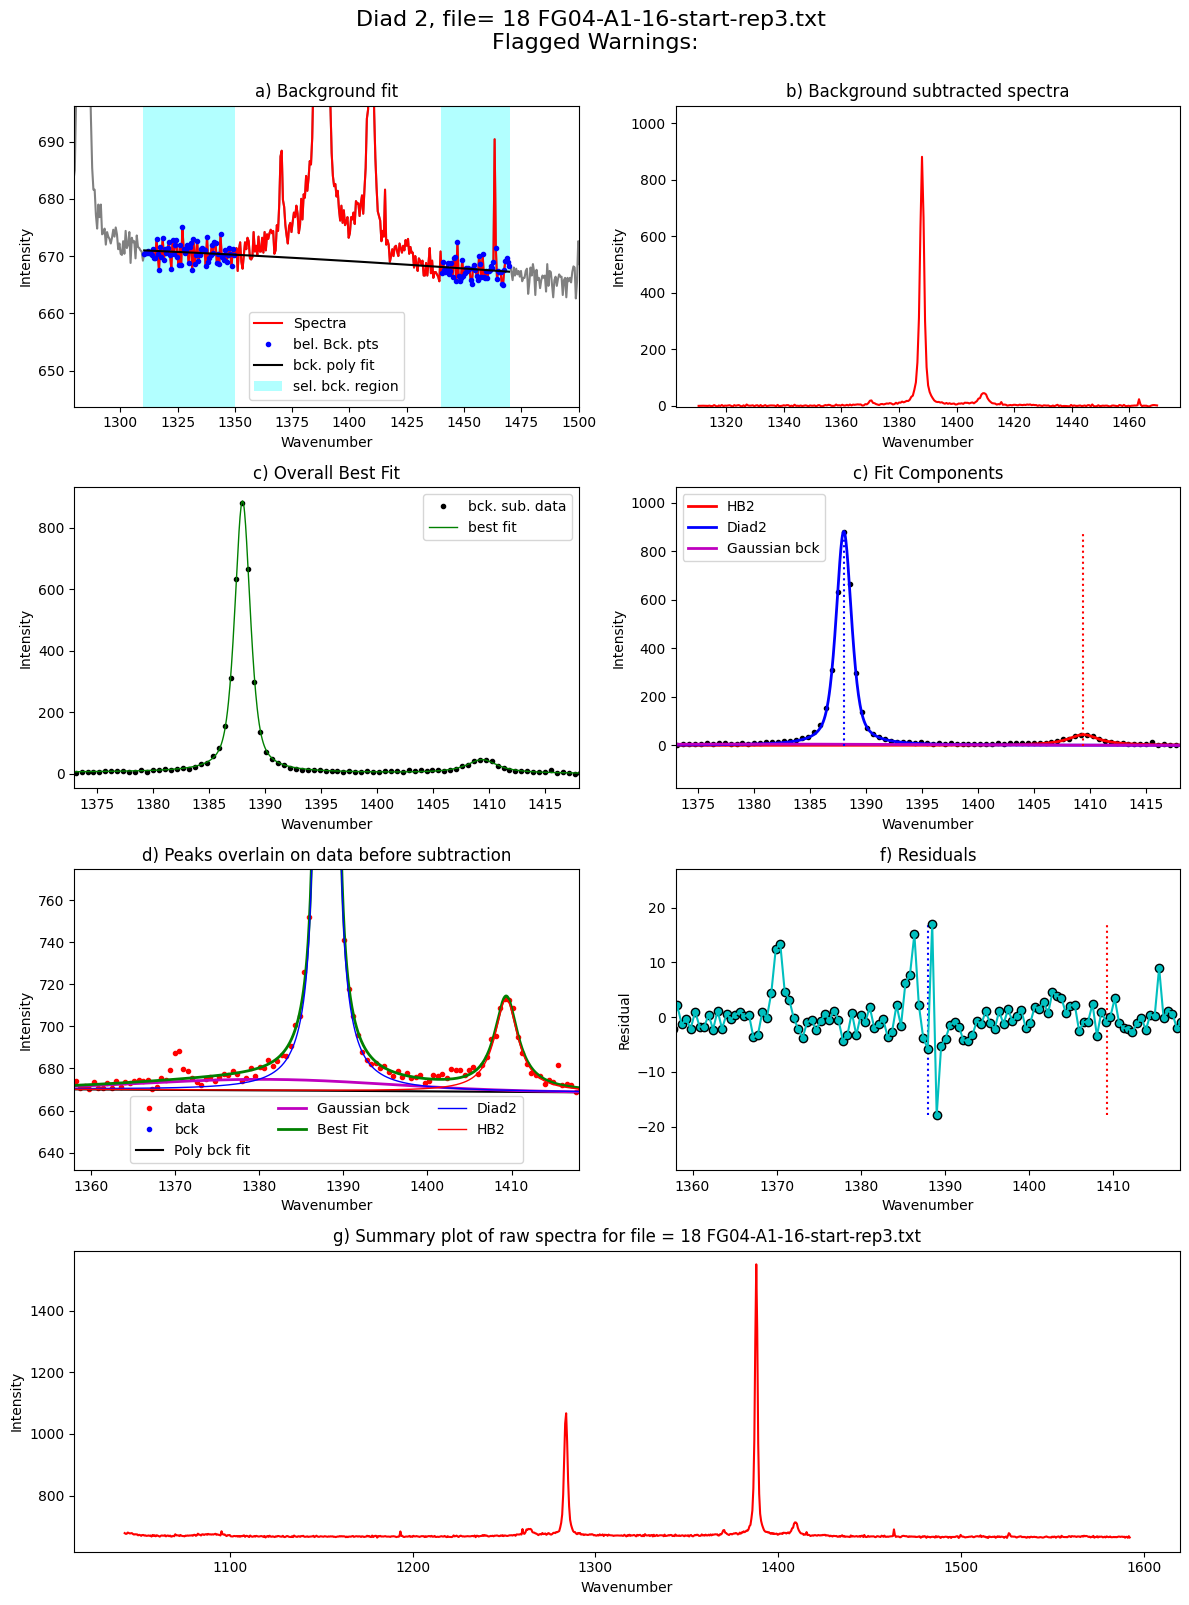

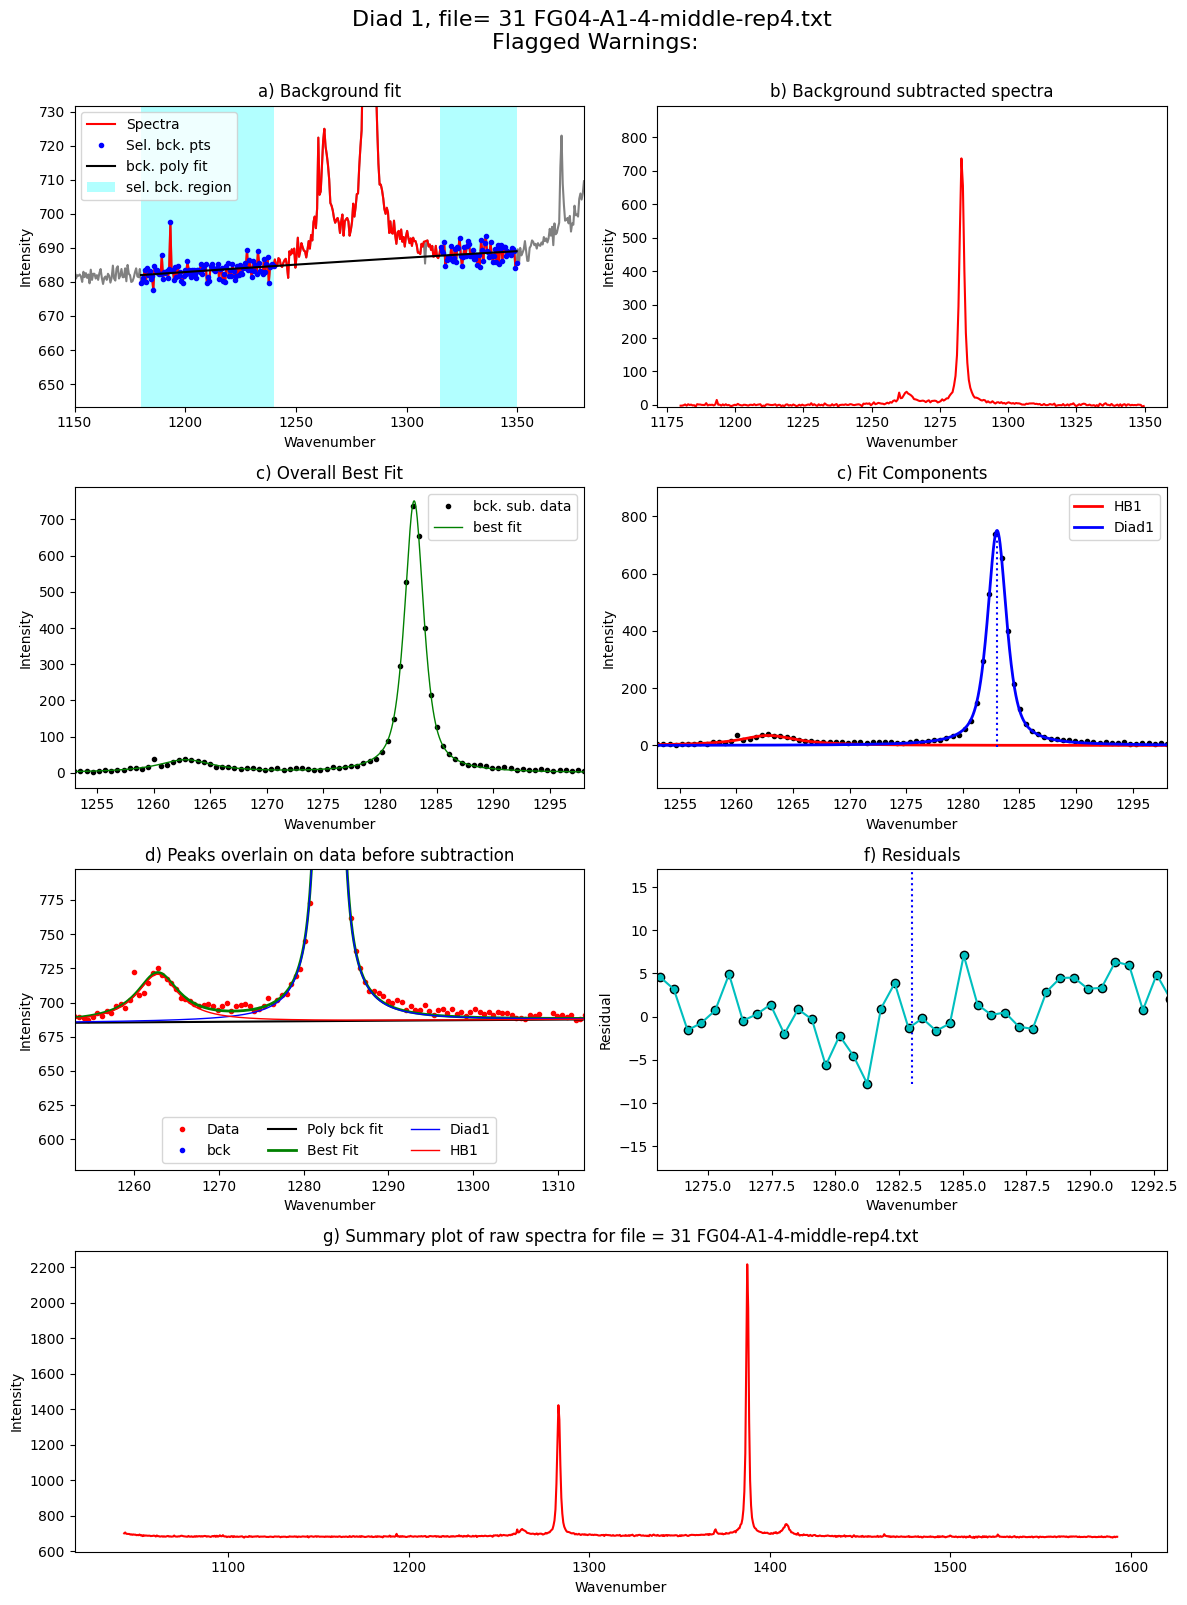

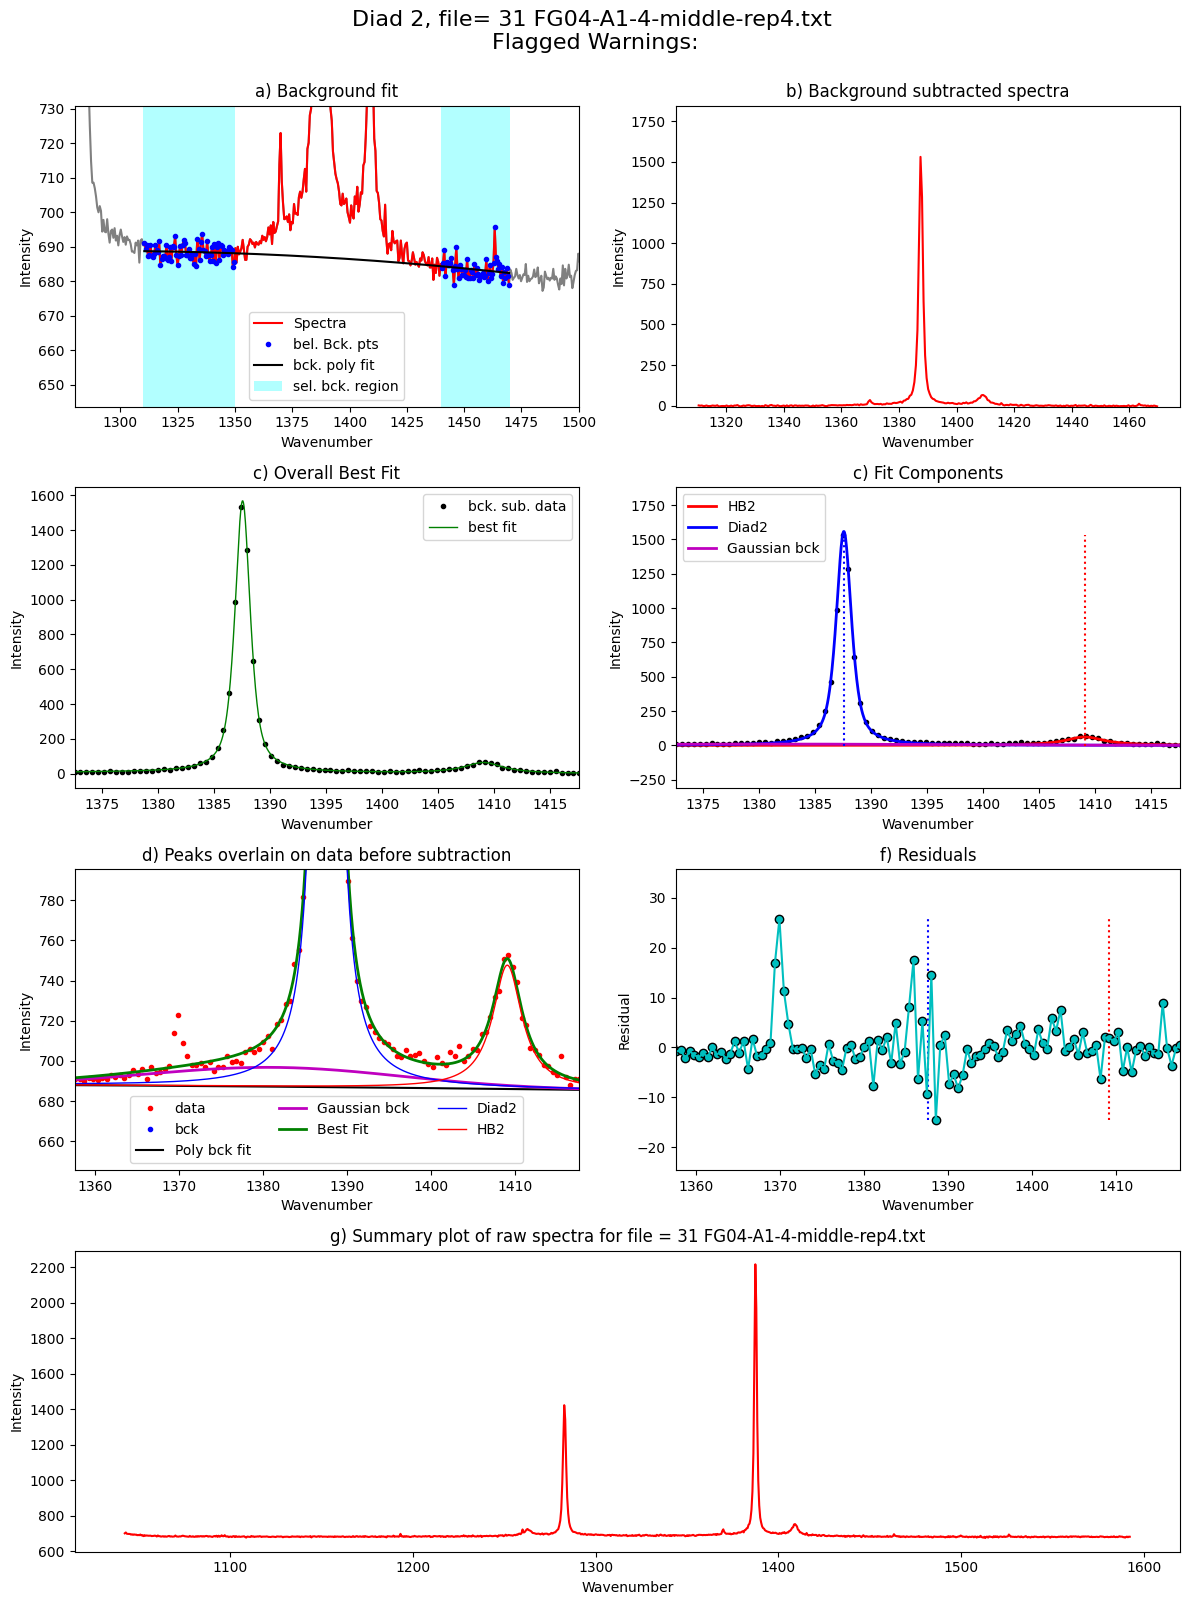

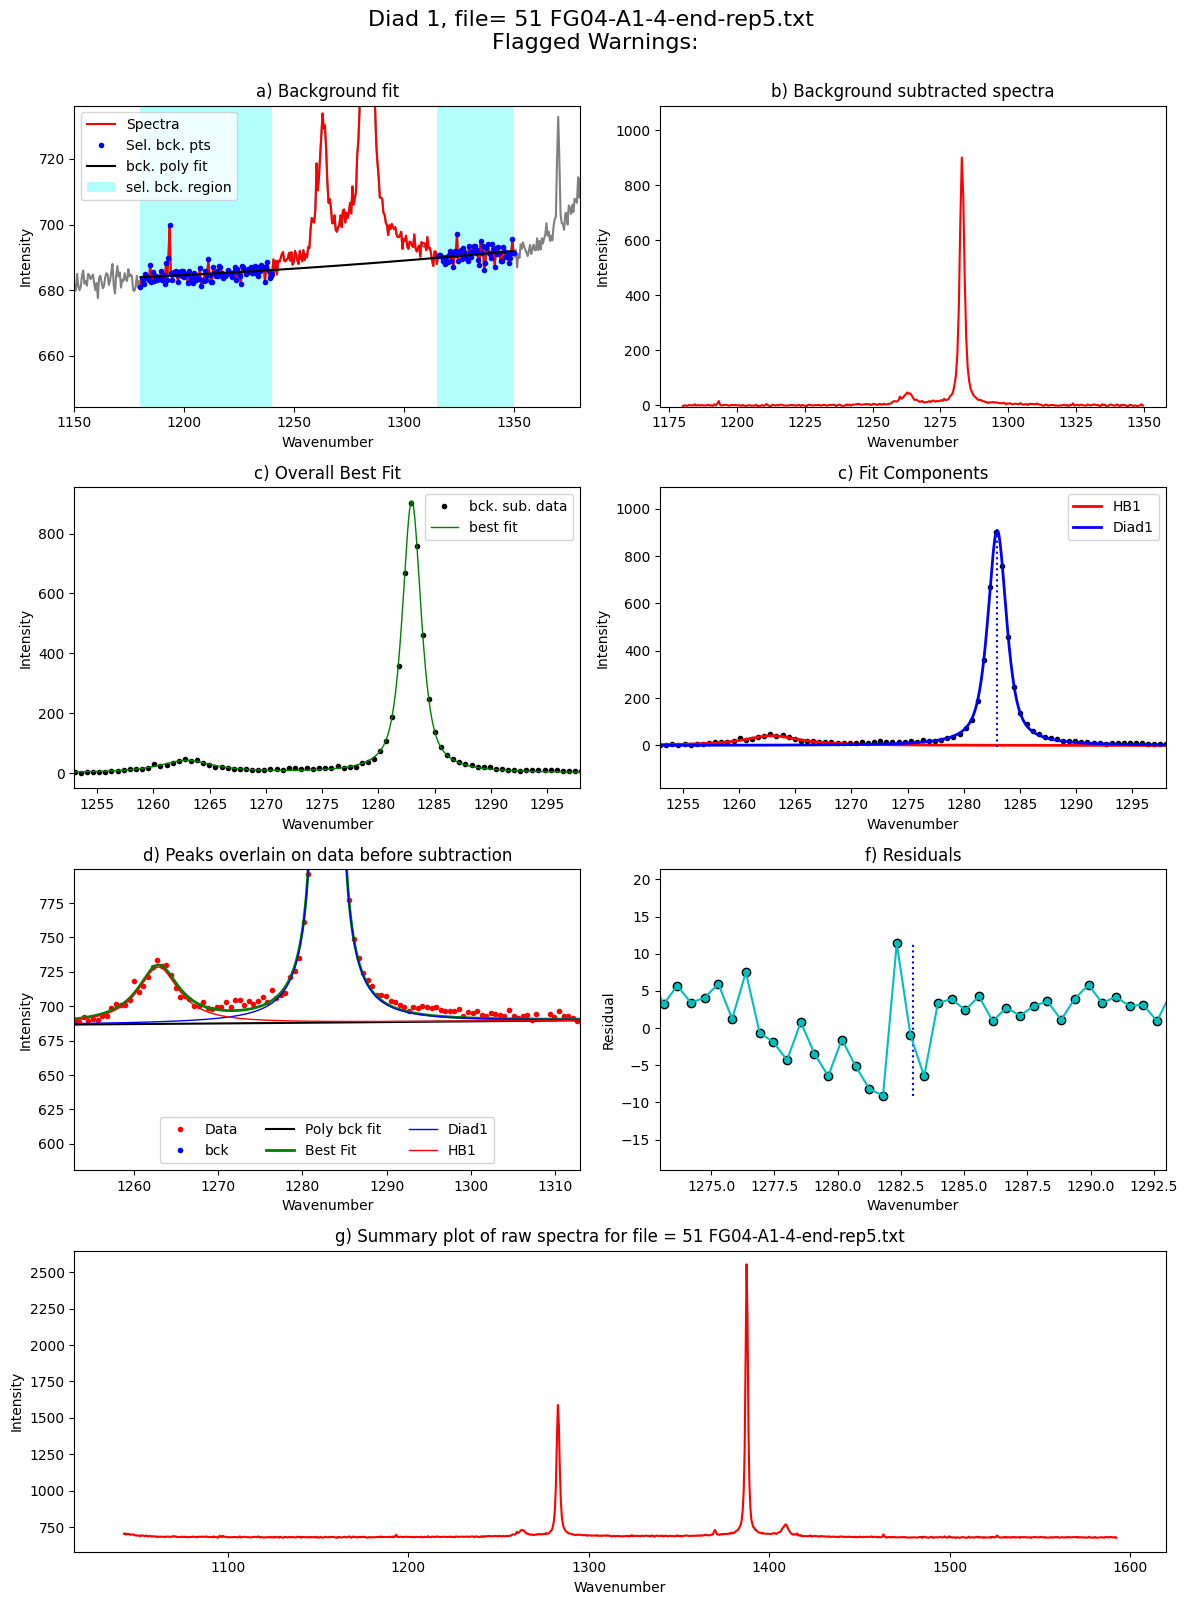

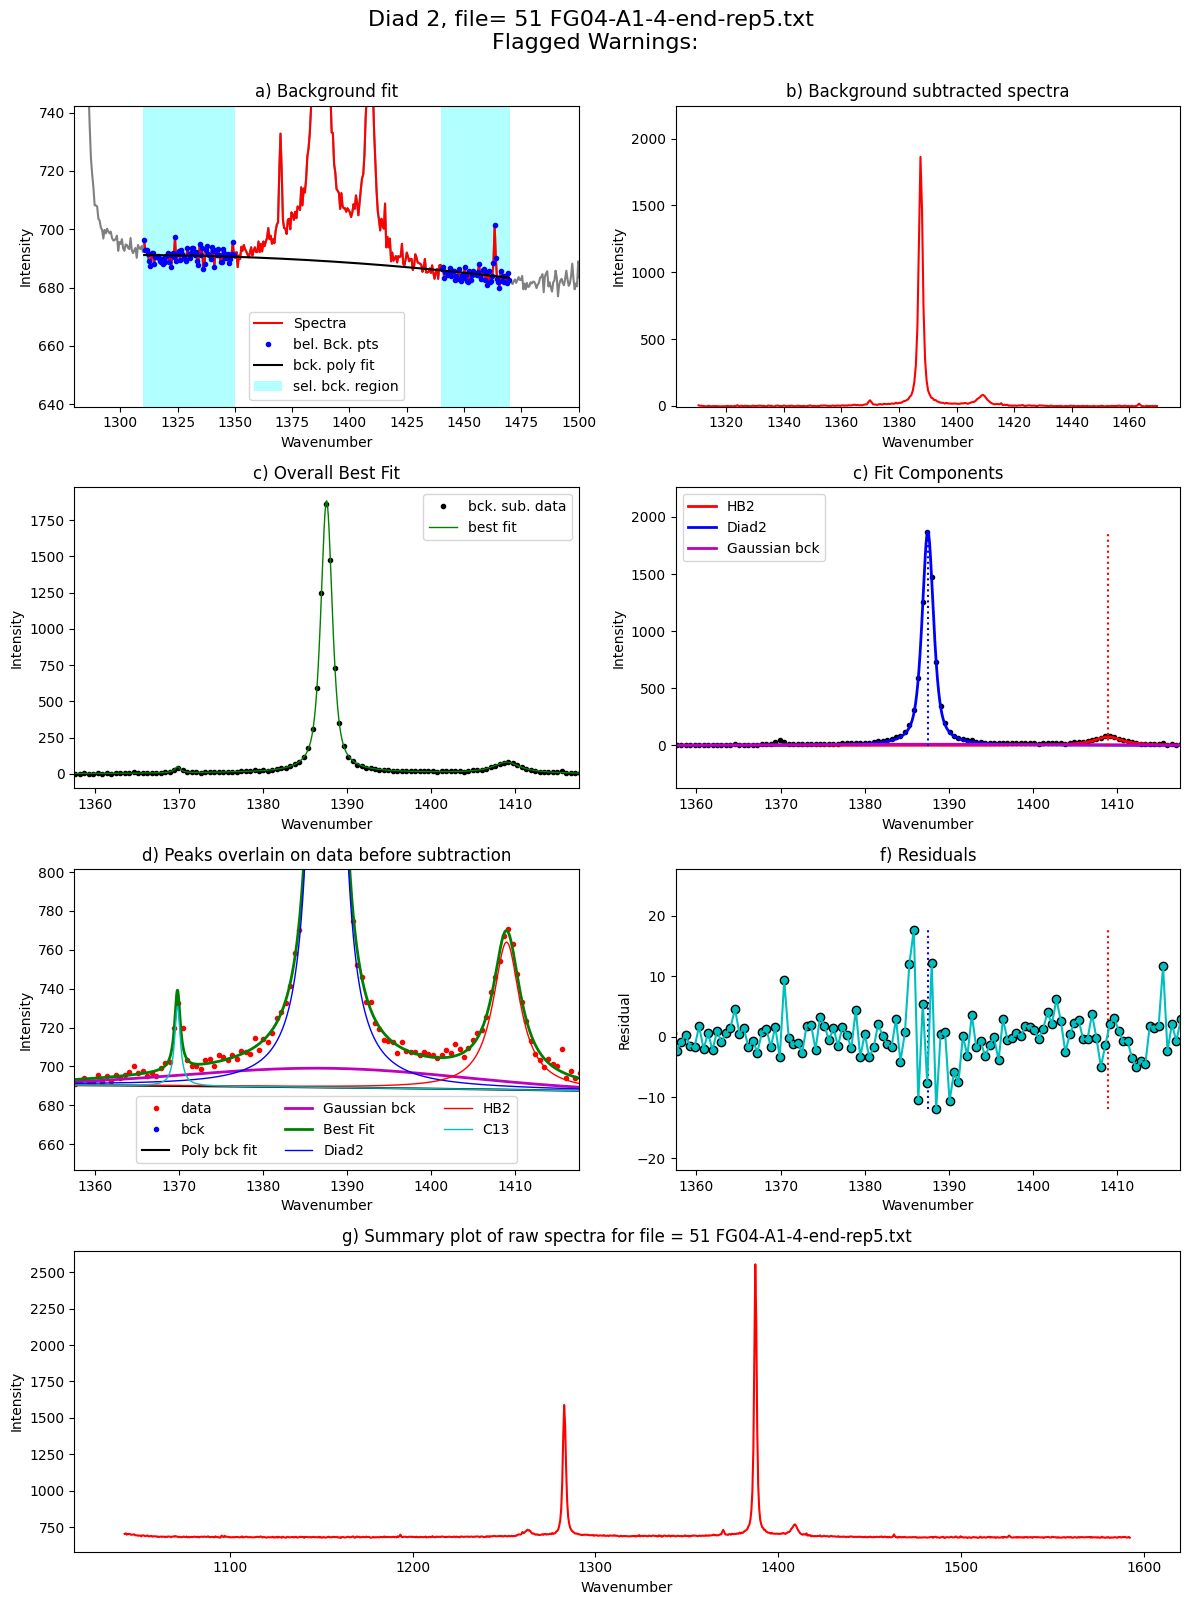

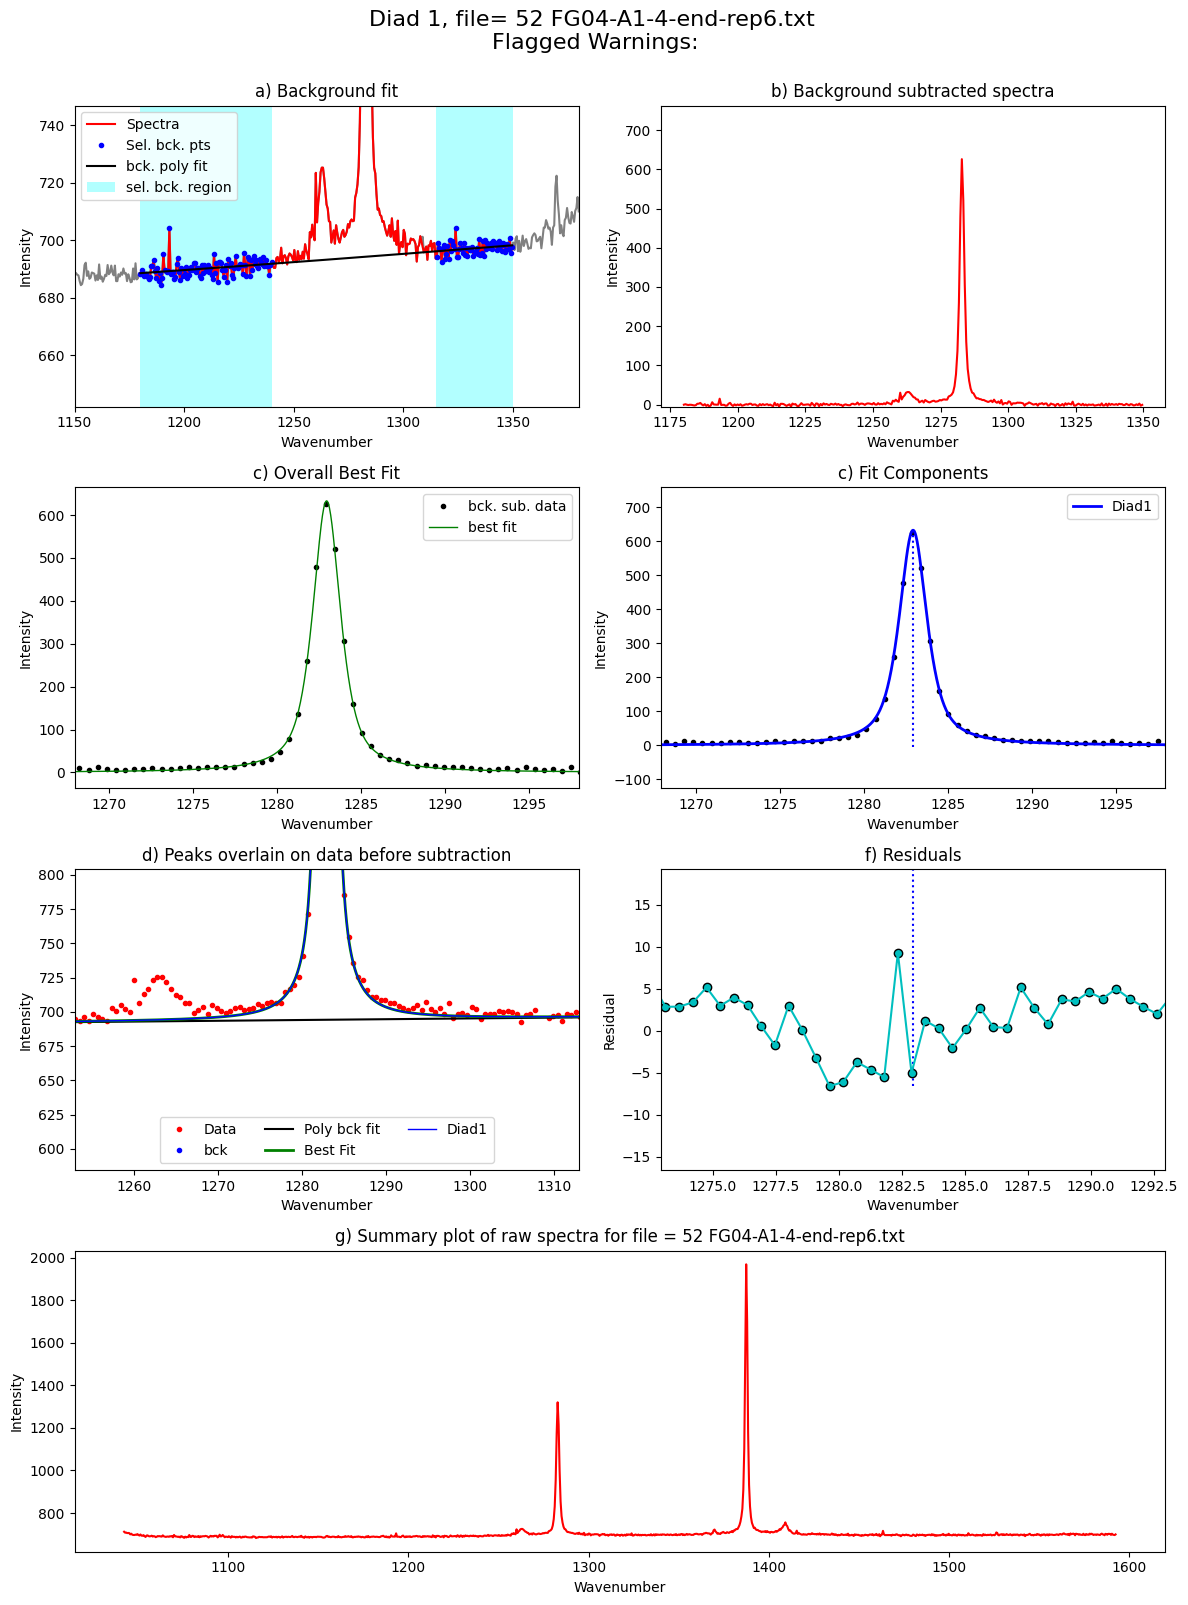

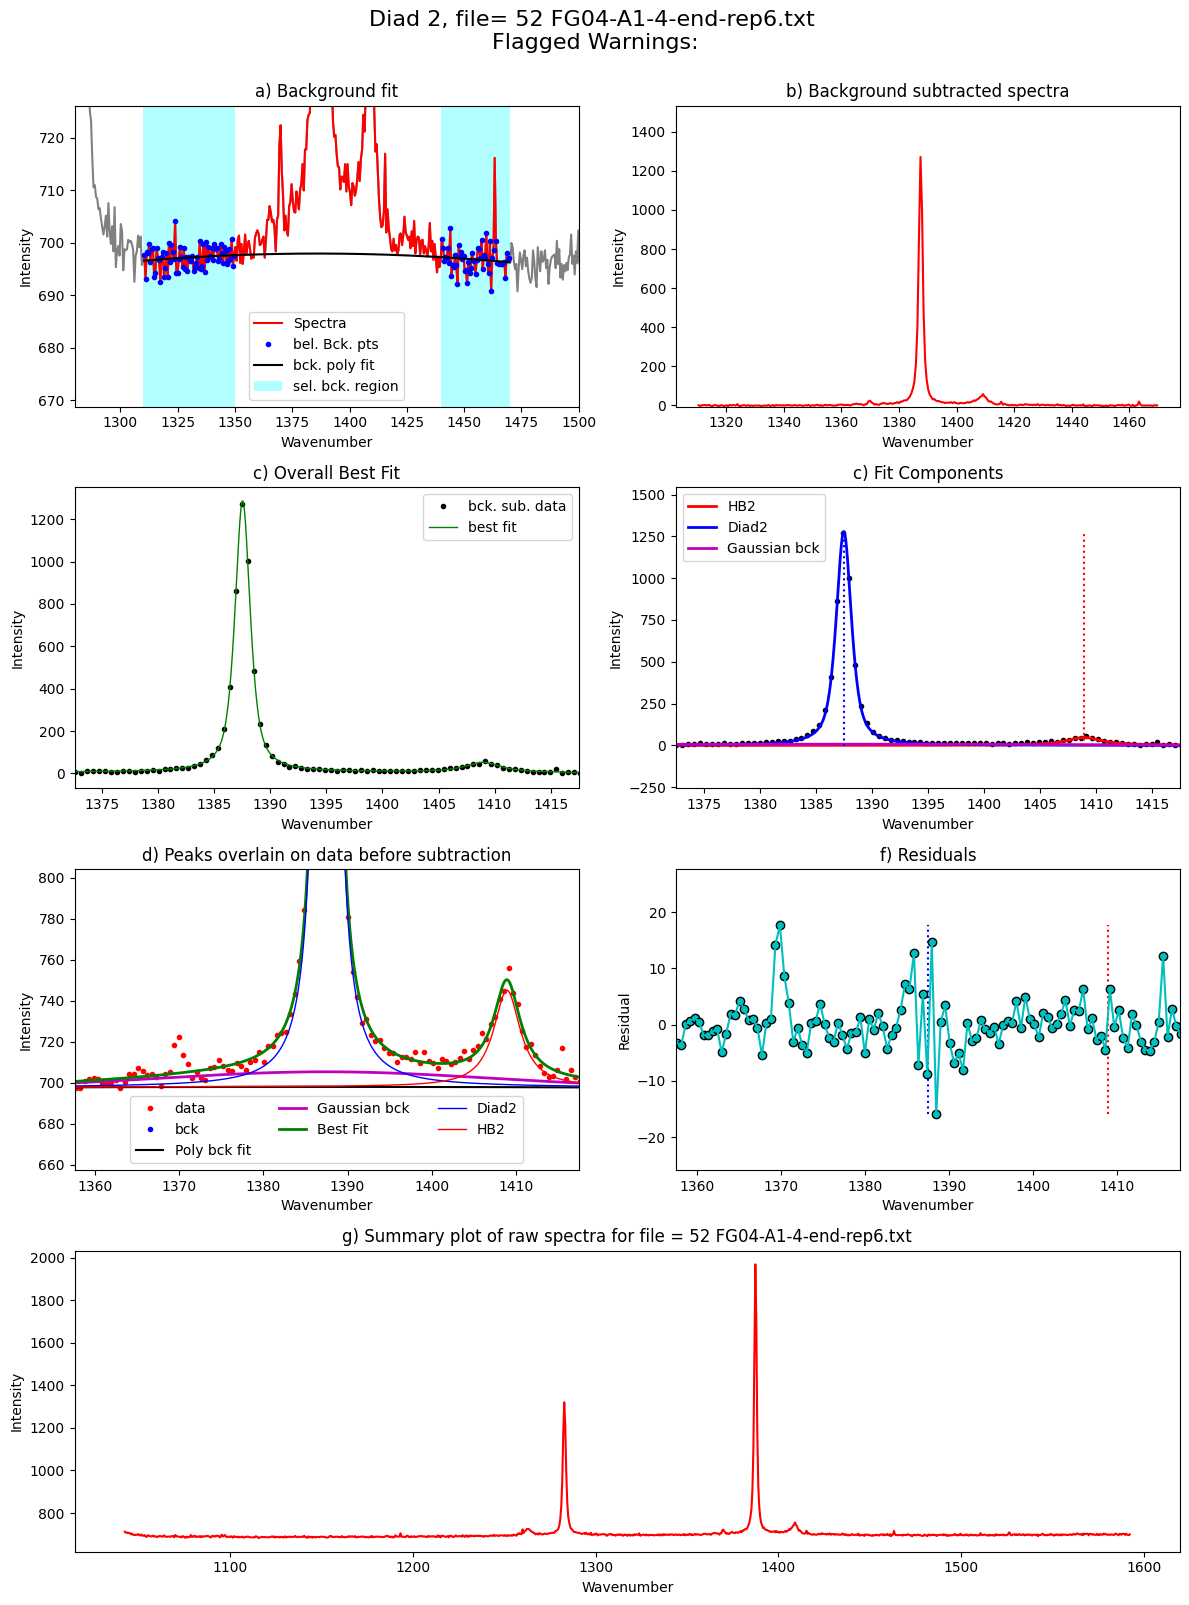

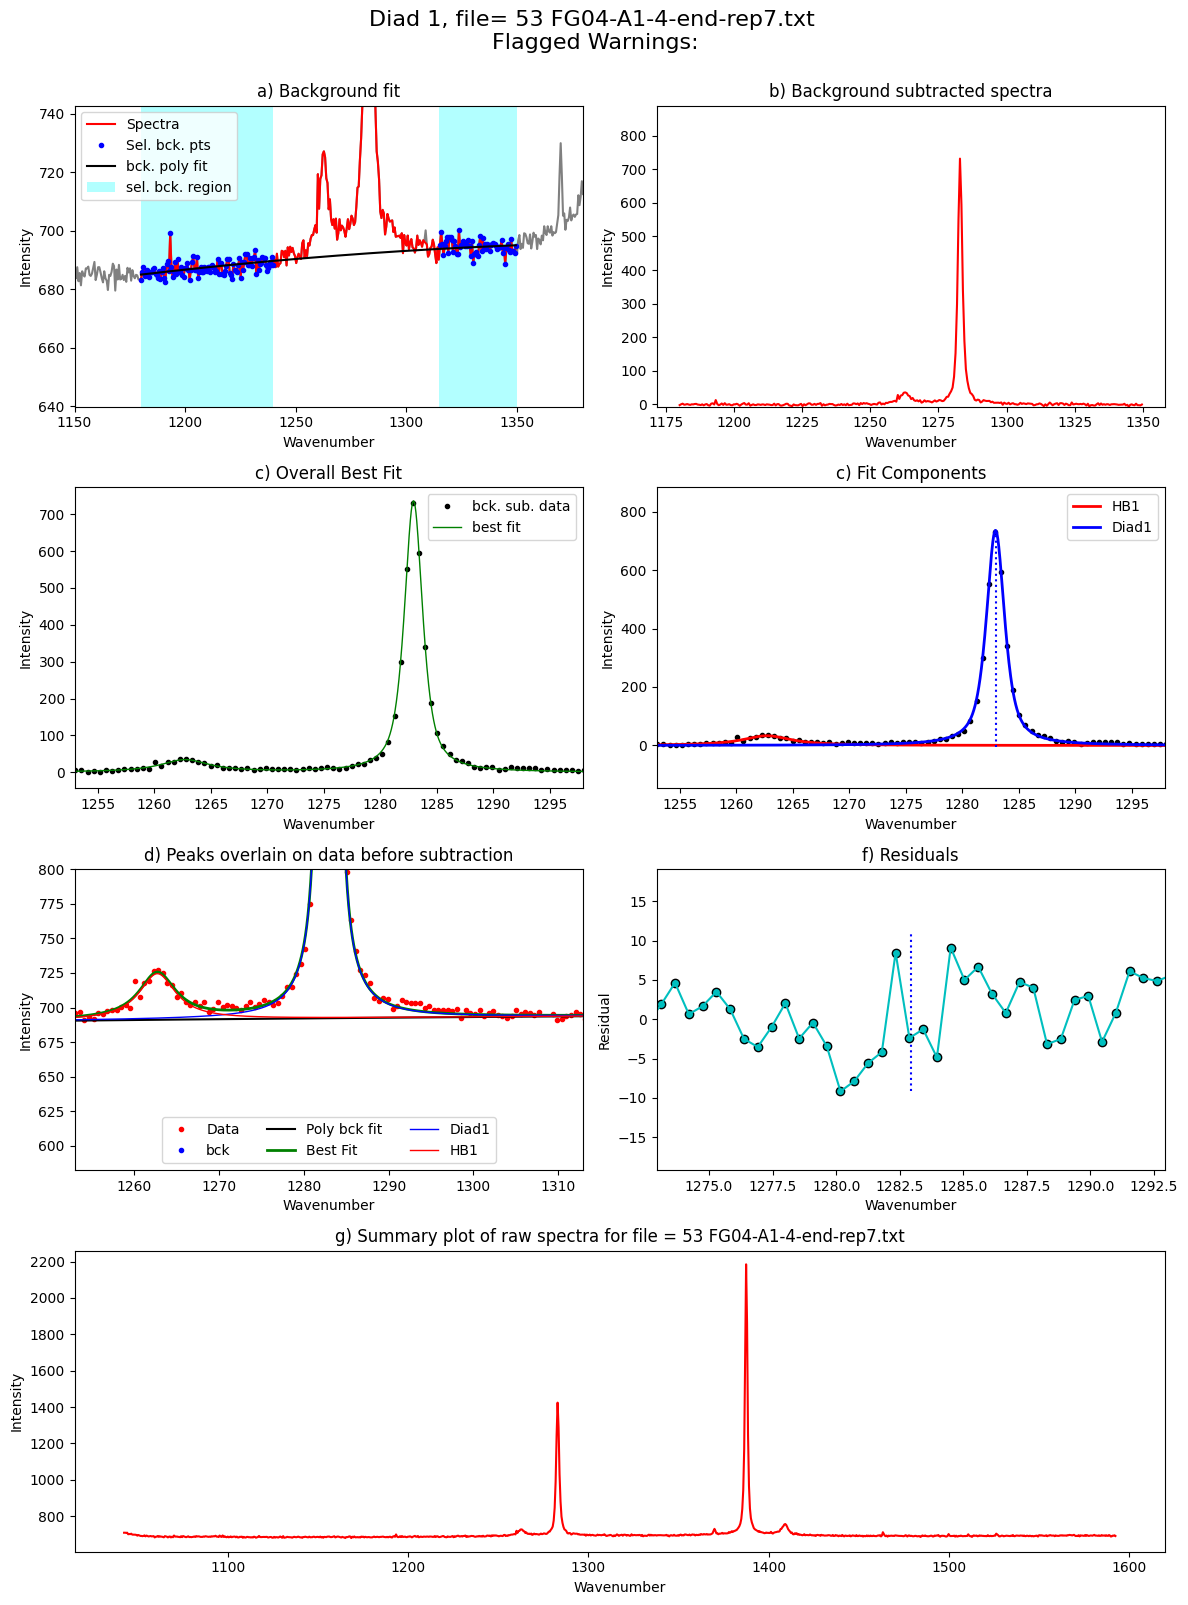

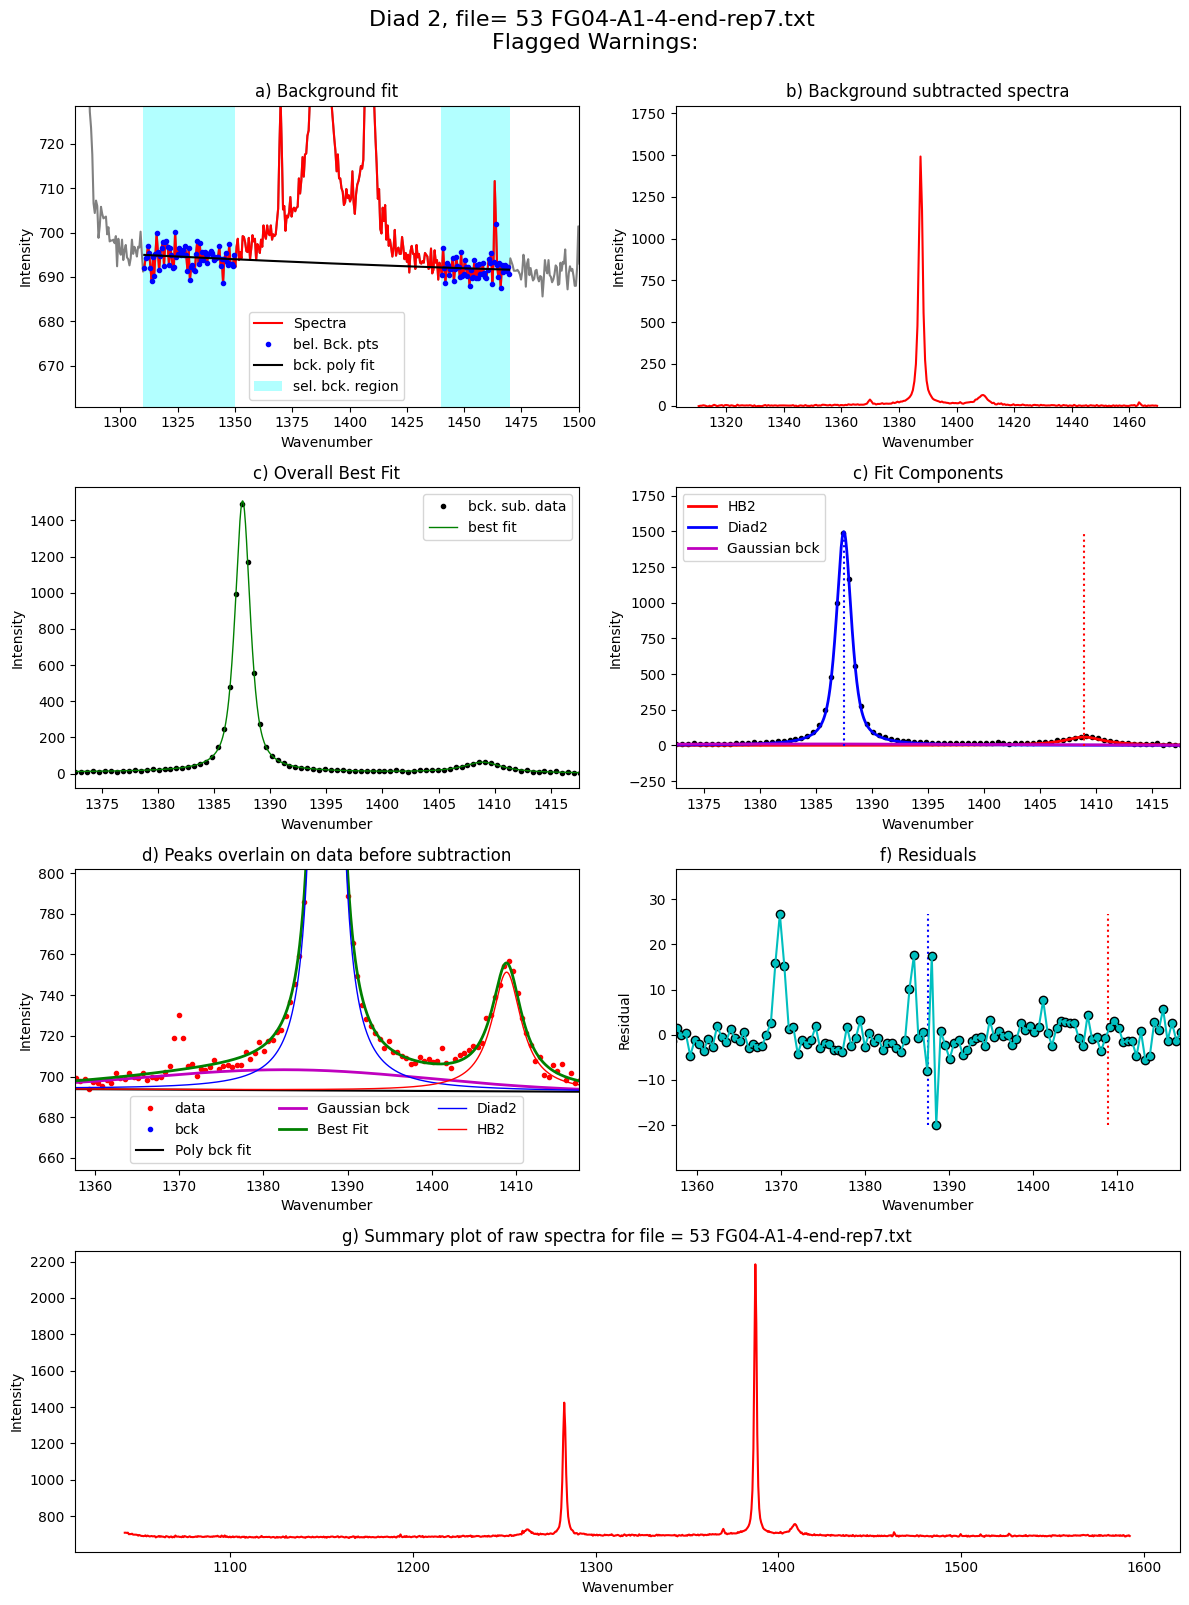

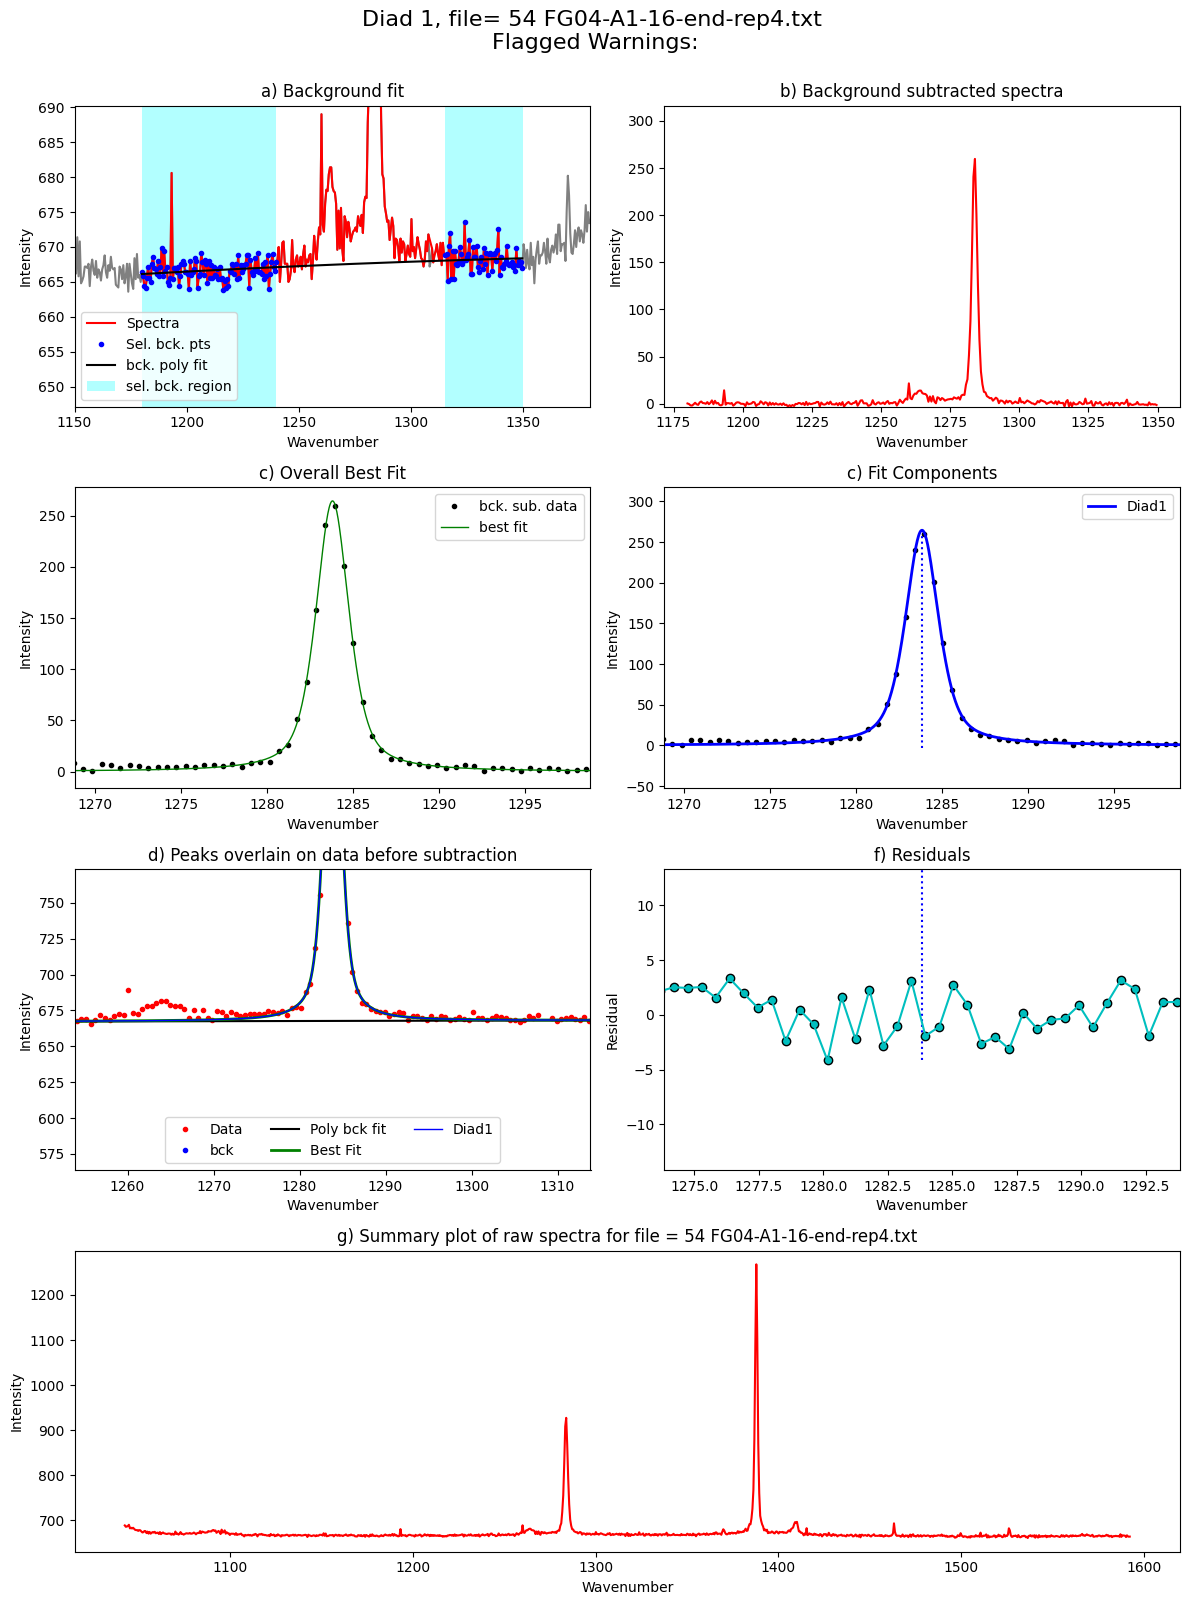

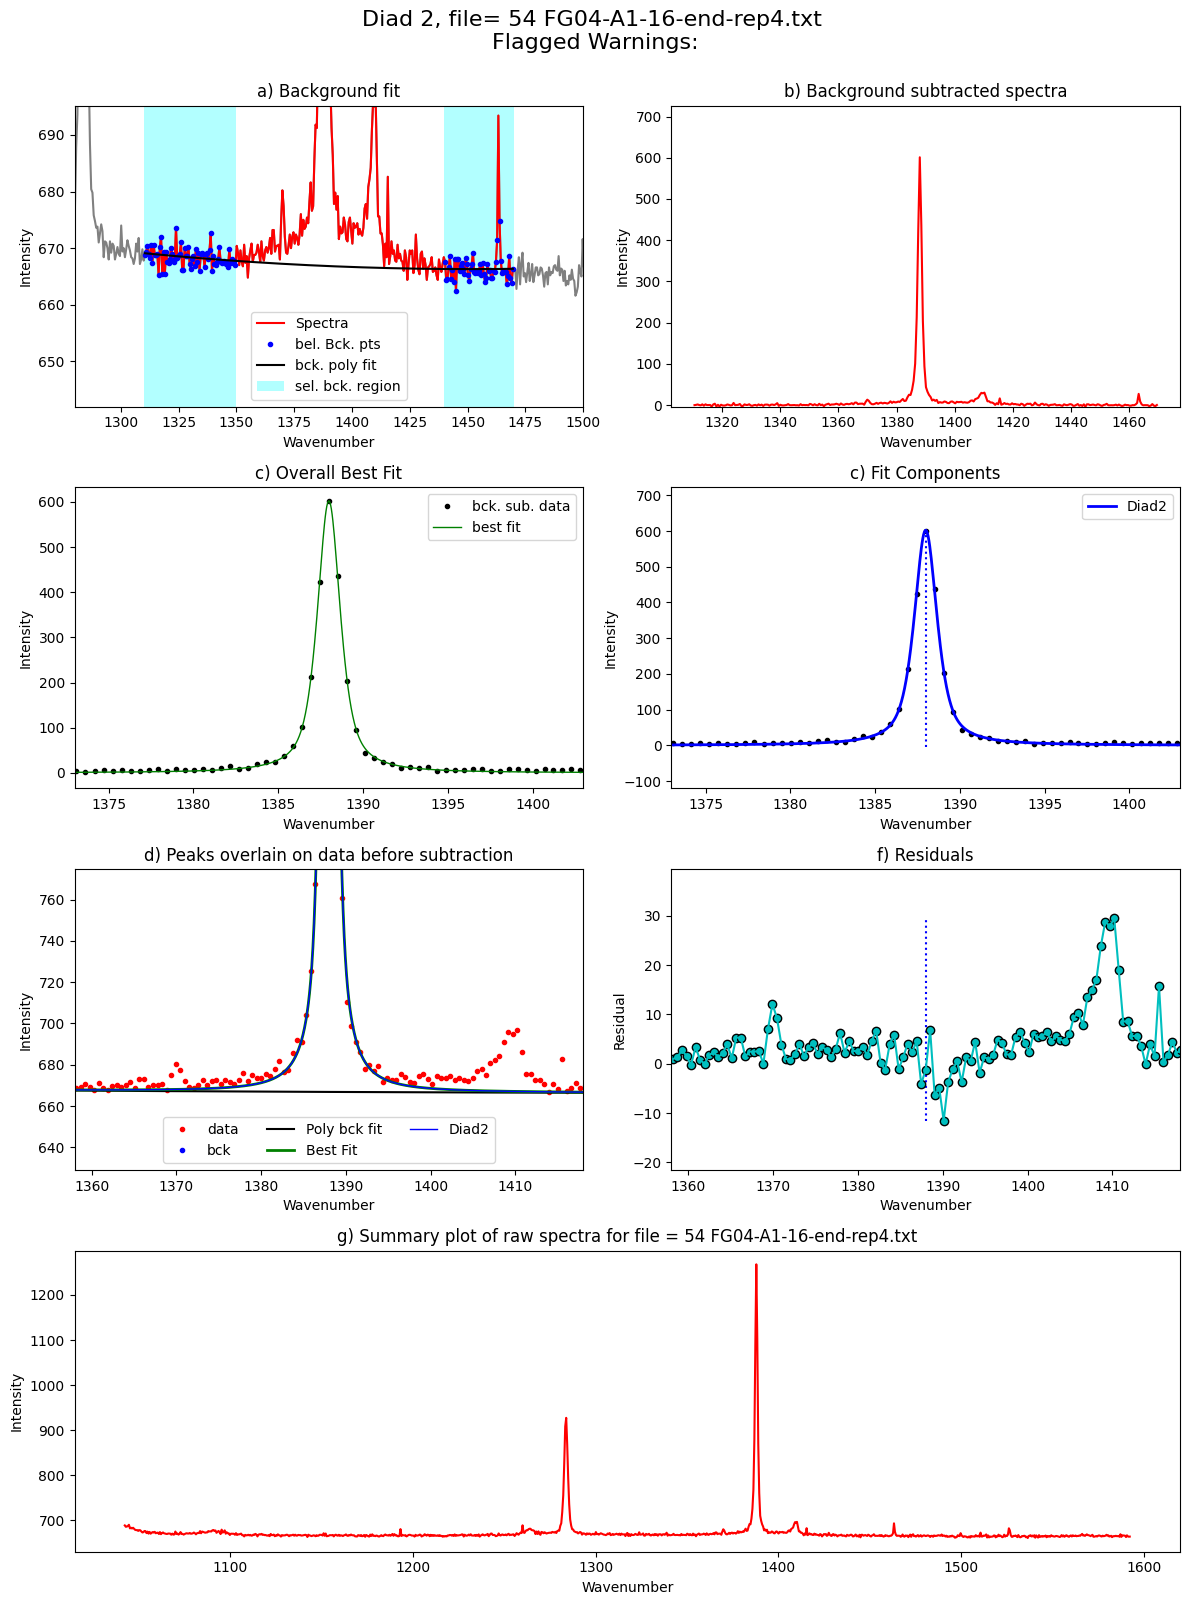

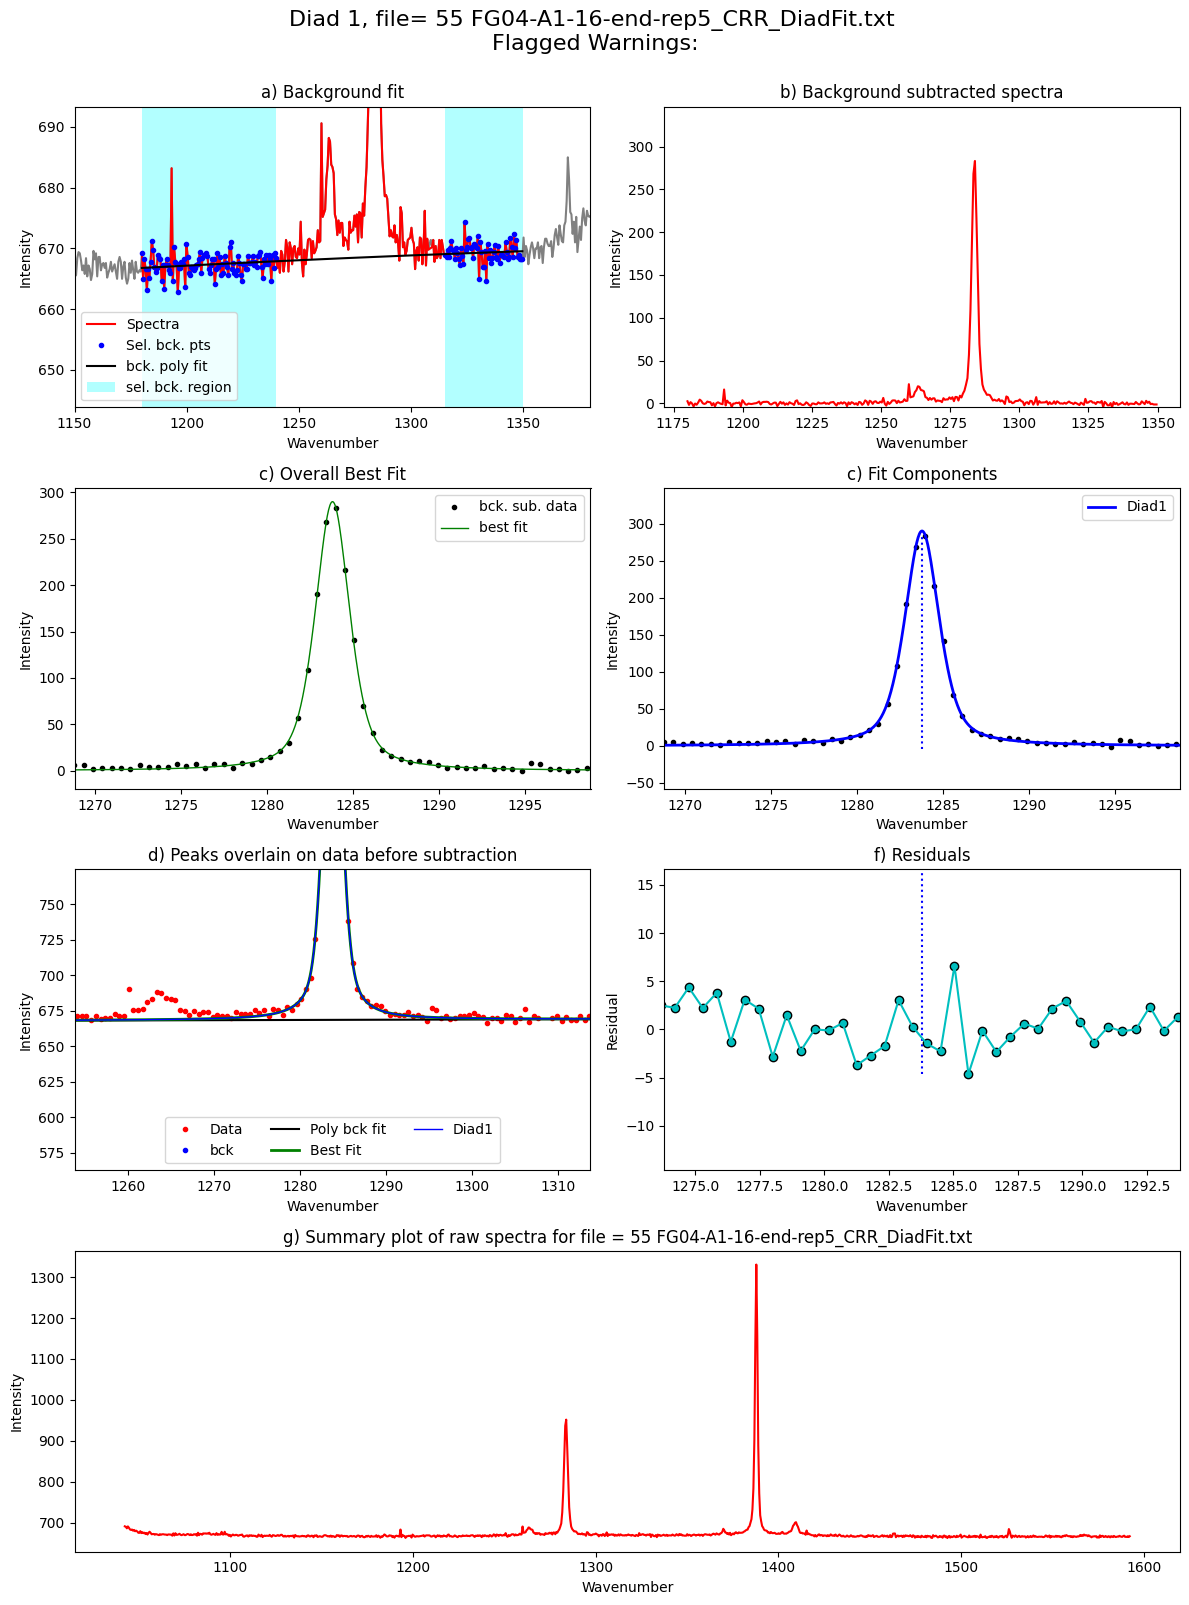

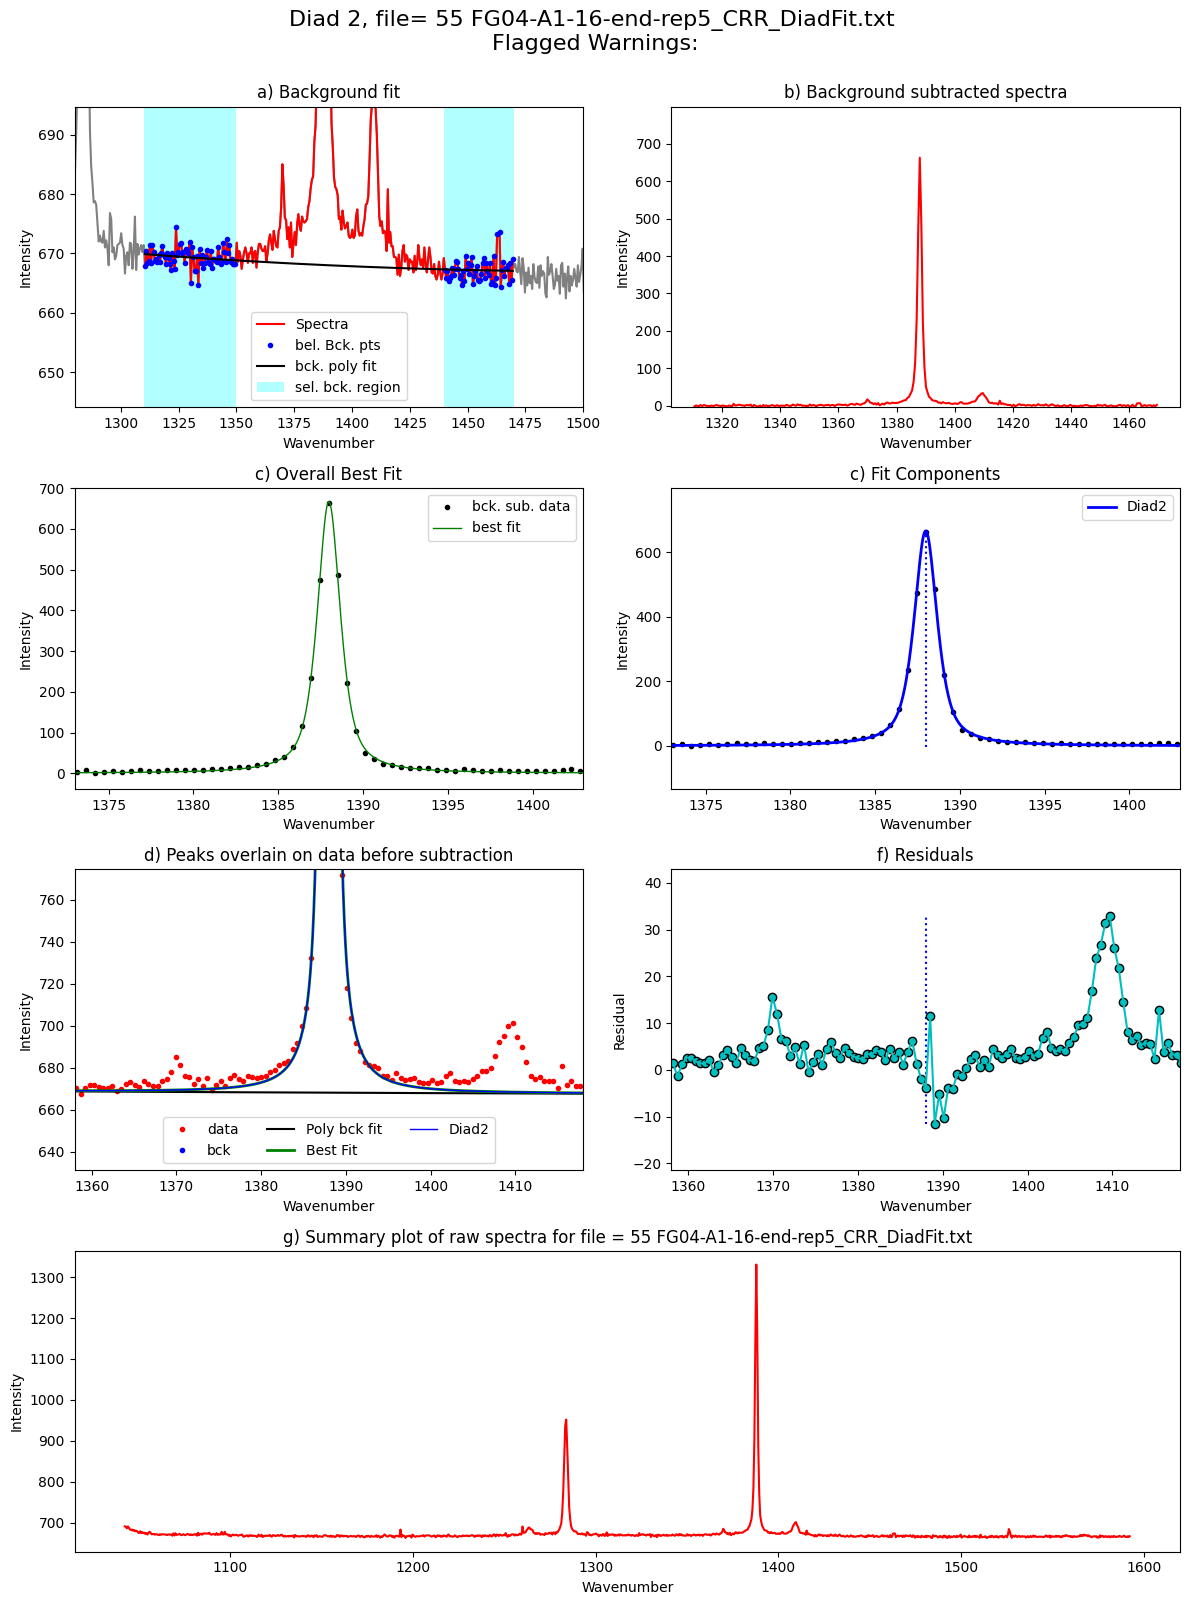

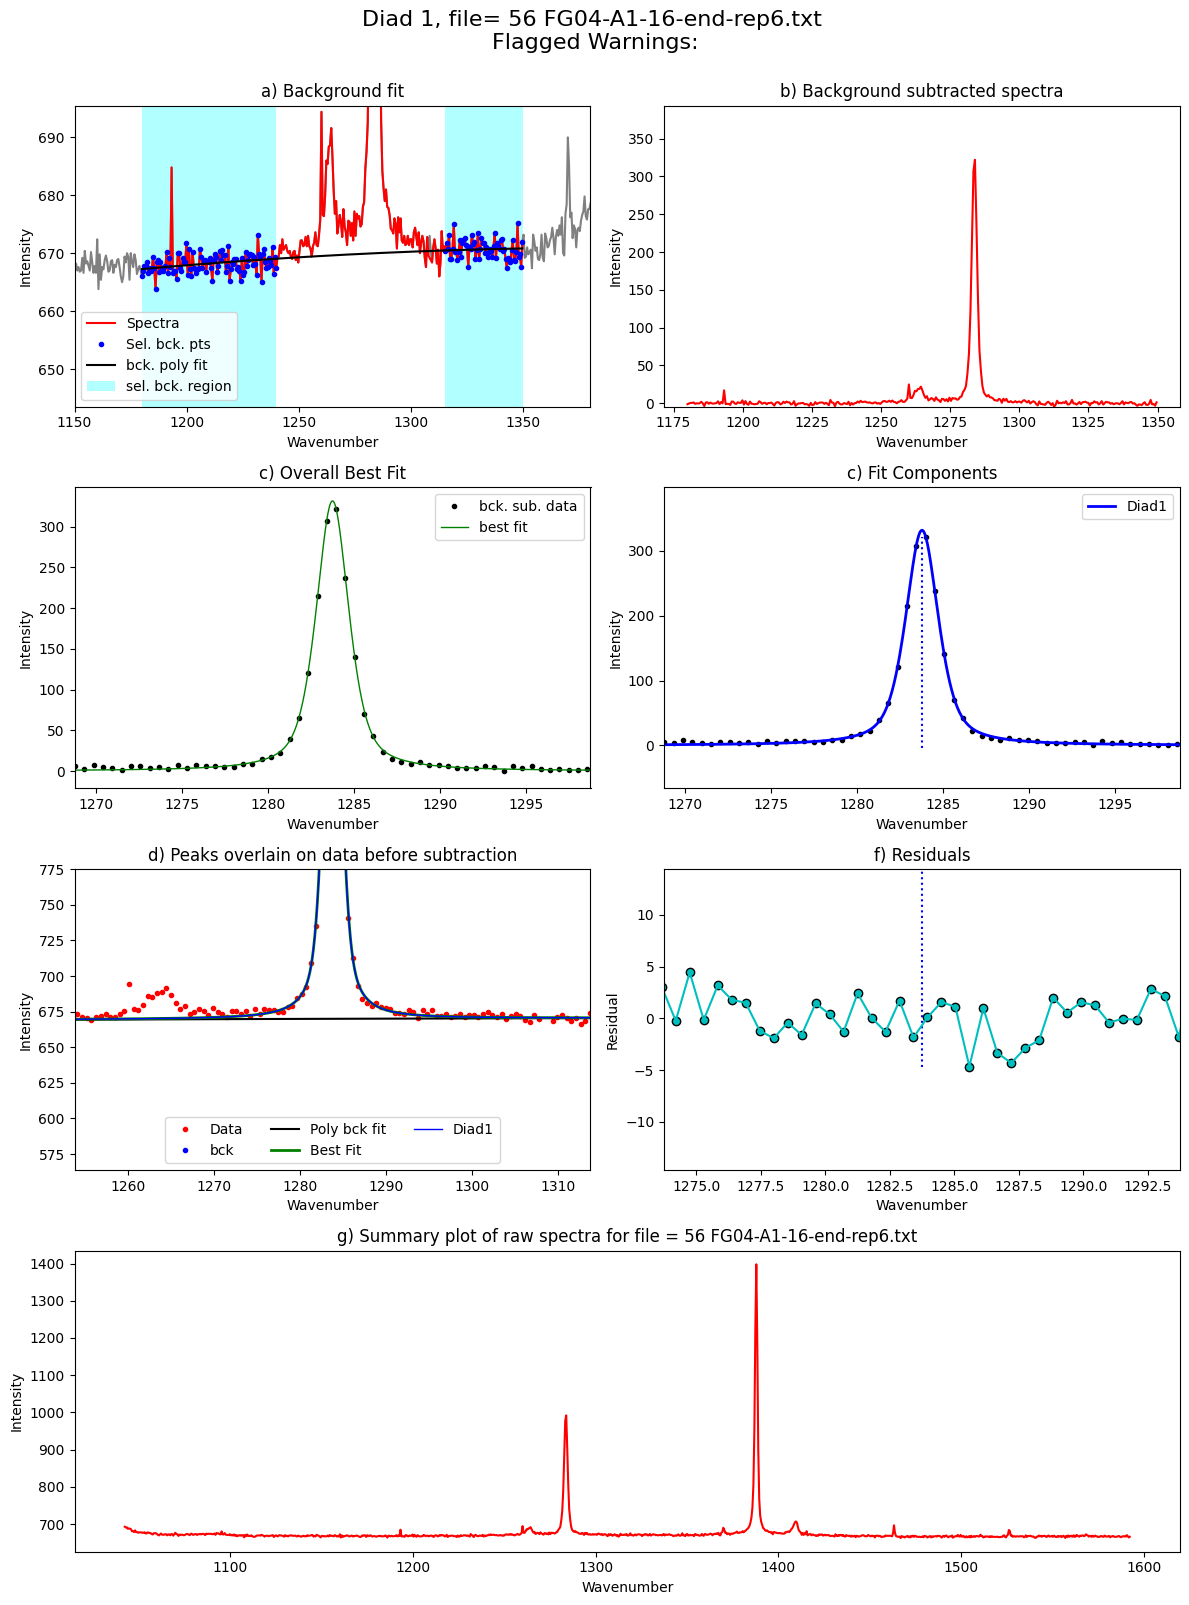

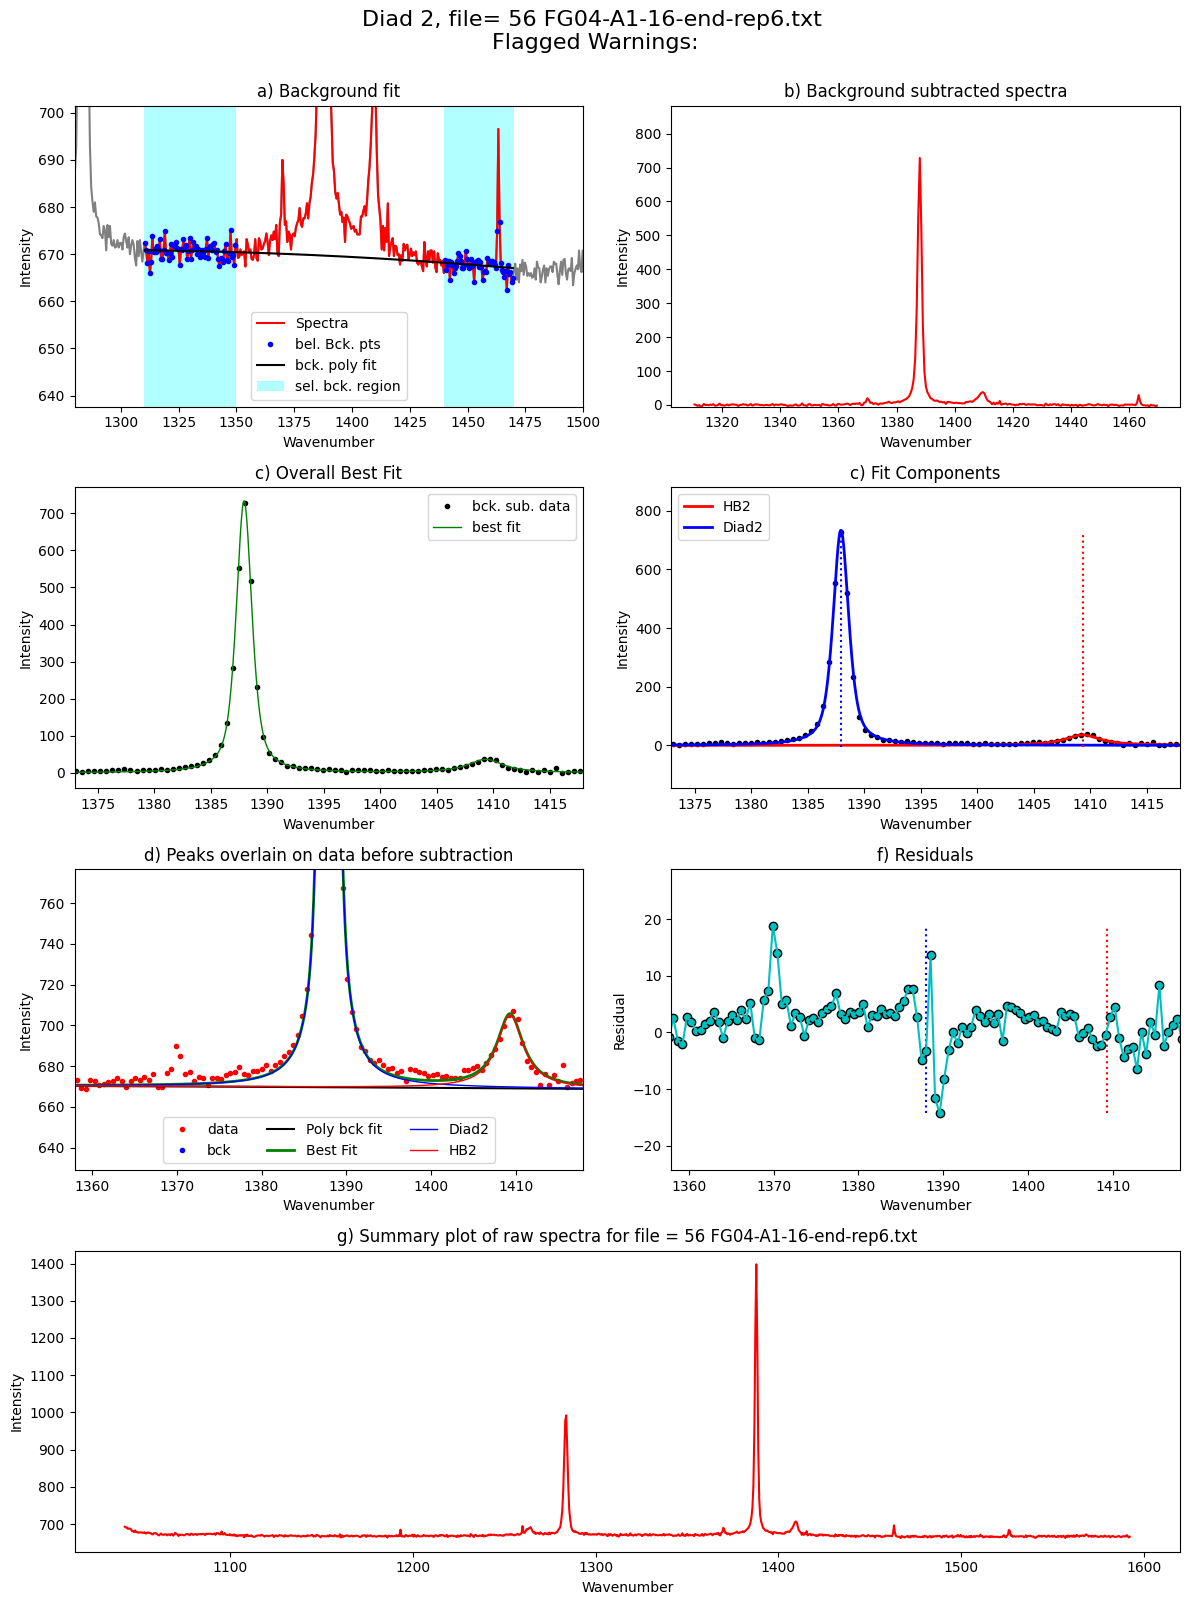

In [46]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [47]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [48]:
combo

filename   Splitting   Split_σ  \
0              FG04-A1-4-start-rep1  104.531666  0.003640   
1              FG04-A1-4-start-rep2  104.542948  0.003417   
2              FG04-A1-4-start-rep3  104.528458  0.003315   
3             FG04-A1-16-start-rep1  104.167764  0.008733   
4             FG04-A1-16-start-rep2  104.179770  0.009129   
5             FG04-A1-16-start-rep3  104.179265  0.008756   
6             FG04-A1-4-middle-rep4  104.549212  0.003436   
7                FG04-A1-4-end-rep5  104.550918  0.002977   
8                FG04-A1-4-end-rep6  104.576043  0.007402   
9                FG04-A1-4-end-rep7  104.582952  0.003547   
10              FG04-A1-16-end-rep4  104.153502  0.011321   
11  FG04-A1-16-end-rep5_CRR_DiadFit  104.195422  0.011859   
12              FG04-A1-16-end-rep6  104.185278  0.009992   

    Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0           1283.027202        0.003161             721.794282   
1           1283.027777        0.002946             777.088053   
2           1283.054256        0.003040             811.251116   
3           1283.827984        0.008382             408.727345   
4           1283.811470        0.008835             417.854546   
5           1283.814782        0.008383             405.604515   
6           1283.021082        0.002990             751.230759   
7           1282.974503        0.002618             909.194648   
8           1282.941437        0.007131             633.162931   
9           1282.934888        0.003035             736.184205   
10          1283.832894        0.009710             264.599755   
11          1283.788433        0.010393             289.957510   
12          1283.752477        0.009355             331.685132   

    Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  \
0        1283.027252       2041.175659           0.992286        2.633967   
1        1283.027827       2228.620681           0.997808        2.726209   
2        1283.054306       2358.300128           1.033643        2.769375   
3        1283.827984       1222.500138           1.087254        3.513923   
4        1283.811470       1268.137666           1.138102        3.838078   
5        1283.814782       1232.050465           1.124016        3.302210   
6        1283.021132       2145.787366           1.005633        2.394931   
7        1282.974553       2572.360781           0.992897        3.043985   
8        1282.941437       1797.326085           0.990212        4.967272   
9        1282.934938       2037.850324           0.968188        2.567972   
10       1283.832894        818.923496           1.143243        2.588386   
11       1283.788433        914.593609           1.186303        2.958358   
12       1283.752477       1015.451388           1.131609        2.933045   

    ...  Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  \
0   ...      1.068421      1.076355                  0.135786   
1   ...      1.053726      1.057831                  0.107217   
2   ...      1.082770      1.083233                  0.171110   
3   ...      1.169435      1.121429                  0.368438   
4   ...      1.002937      1.023861                  0.006685   
5   ...      1.078704      1.029638                  0.176928   
6   ...      1.025381      1.033373                  0.051047   
7   ...      1.082892      1.085608                  0.164607   
8   ...      1.046875      1.046569                  0.092832   
9   ...      1.026549      1.062344                  0.051408   
10  ...      1.070336      1.050647                  0.160823   
11  ...      1.028249      1.001033                  0.067023   
12  ...      1.036090      1.038210                  0.081680   

    Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0               0.002749      1.049383      1.030568   
1               0.002568      1.020161      1.000000   
2               0.002548      1.040241      1.021246   
3               0.005320      1.0

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [49]:
# # !pip install winotify

# from winotify import Notification, audio

# toast= Notification(app_id="VSCode",title="Notebook completed",
#                     msg="Step3b_Secondary_Peaks is done!",
#                     duration="short")
# toast.set_audio(audio.Mail,loop=False)
# toast.show()